# Merge and clean CSV files

In [1]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob

os.getcwd()

'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel'

In [8]:
file_list = glob.glob(os.path.join('huc5', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True)

#Drop na, synch column names if needed, and remove negative band values
df=dataframe.dropna(subset='red')#.drop_duplicates()
df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.nir > 0)]

df = df.assign(Matchup = 'Fusion')
print(df.columns.values.tolist())
print(df.shape[0])

['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'Matchup']
64301


In [3]:
#df.describe()

In [7]:
# Column formatting
# df['date'] = df['date'].str.slice(2, 12)
# df['date'] = df['date'].str.replace('_','-')
# df.date

0        14-09-23
1        13-03-31
2        13-03-31
3        07-10-01
4        09-03-20
           ...   
64296    13-02-18
64297    13-02-19
64298    13-02-23
64299    13-02-24
64300    14-02-01
Name: date, Length: 64301, dtype: object

In [9]:
#Add band ratios
df = df.assign(NR = df['nir']/df['red'],
                BR = df['blue']/df['red'],
                GR = df['green']/df['red'],
                SR = df['swir1']/df['red'],
                BG = df['blue']/df['green'],
                RG = df['red']/df['green'],
                NG = df['nir']/df['green'],
                SG = df['swir1']/df['green'],
                BN = df['blue']/df['nir'],
                GN = df['green']/df['nir'],
                RN = df['red']/df['nir'],
                SN = df['swir1']/df['nir'],
                BS = df['blue']/df['swir1'],
                GS = df['green']/df['swir1'],
                RS = df['red']/df['swir1'],
                NS = df['nir']/df['swir1'],
                R_GN = df['red']/ (df['green'] + df['nir']),
                R_GB = df['red']/ (df['green'] + df['blue']),
                R_GS = df['red']/ (df['green'] + df['swir1']),
                R_BN = df['red']/ (df['blue'] + df['nir']),
                R_BS = df['red']/ (df['blue'] + df['swir1']),
                R_NS = df['red']/ (df['nir'] + df['swir1']),
                G_BR = df['green']/ (df['blue'] + df['red']),
                G_BN = df['green'] / (df['blue'] + df['nir']),
                G_BS = df['green'] / (df['blue'] + df['swir1']),
                G_RN = df['green'] / (df['red'] + df['nir']),
                G_RB = df['green'] / (df['red'] + df['blue']),
                G_NS = df['green'] / (df['nir'] + df['swir1']),
                B_RG = df['blue'] / (df['red'] + df['green']),
                B_RN = df['blue'] / (df['red'] + df['nir']),
                B_RS = df['blue'] / (df['red'] + df['swir1']),
                B_GN = df['blue'] / (df['green'] + df['nir']),
                B_GS = df['blue'] / (df['green'] + df['swir1']),
                B_NS = df['blue'] / (df['nir'] + df['swir1']),
                N_RG = df['nir'] / (df['red'] + df['green']),
                N_RB = df['nir'] / (df['red'] + df['blue']),
                N_RS = df['nir'] / (df['red'] + df['swir1']),
                N_GB = df['nir'] / (df['green'] + df['blue']),
                N_GS = df['nir'] / (df['green'] + df['swir1']),
                N_BS = df['nir'] / (df['blue']  + df['swir1']),
                
                GR2 = (df['green'] + df['red']) / 2,
                GN2 = (df['green'] + df['nir']) / 2,
                RN2 = (df['red'] + df['nir']) / 2,
               
                #blooms
                BR_G = (df['blue'] - df['red']) / df['green'],
                NS_NR = (df['nir'] - df['swir1']) / (df['red'] - df['swir1']),
                fai = df['nir'] - (df['red'] + (df['swir1']-df['red'])*((830-660)/(1650-660))),
                # fai = (nir - red) + (red -swir) * (830-660)/(1648-660)
                N_S= df['nir'] - df['swir1'],
                N_R = df['nir']- df['red'],
                #
                ndvi = ((df['nir']-df['red'])/(df['nir']+df['red'])),
                ndwi = ((df['green']- df['swir1'])/(df['green'] + df['swir1'])),
                ndssi = ((df['blue'] - df['nir'])/ (df['blue'] + df['nir'])),
                gn_gn= ((df['green']- df['nir'])/ (df['green'] + df['nir'])),
                Matchup = 'fusion')


In [10]:
#Rename to fusion and add some new colunms for plotting/sorting/exploring data
fusion = df.sort_values(by = 'date')
#fusion['date'] = pd.to_datetime(fusion.date).dt.strftime("%Y-%m-%d")
fusion['year'] = pd.to_datetime(fusion['date']).dt.year
fusion['month'] = pd.to_datetime(fusion['date']).dt.month
print(fusion.columns.values.tolist())
print(fusion.shape[0])

['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'Matchup', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month']
64301


In [7]:
#fusion.to_csv(r'r_gbFusion_16Sites.csv')

<AxesSubplot: xlabel='date', ylabel='red'>

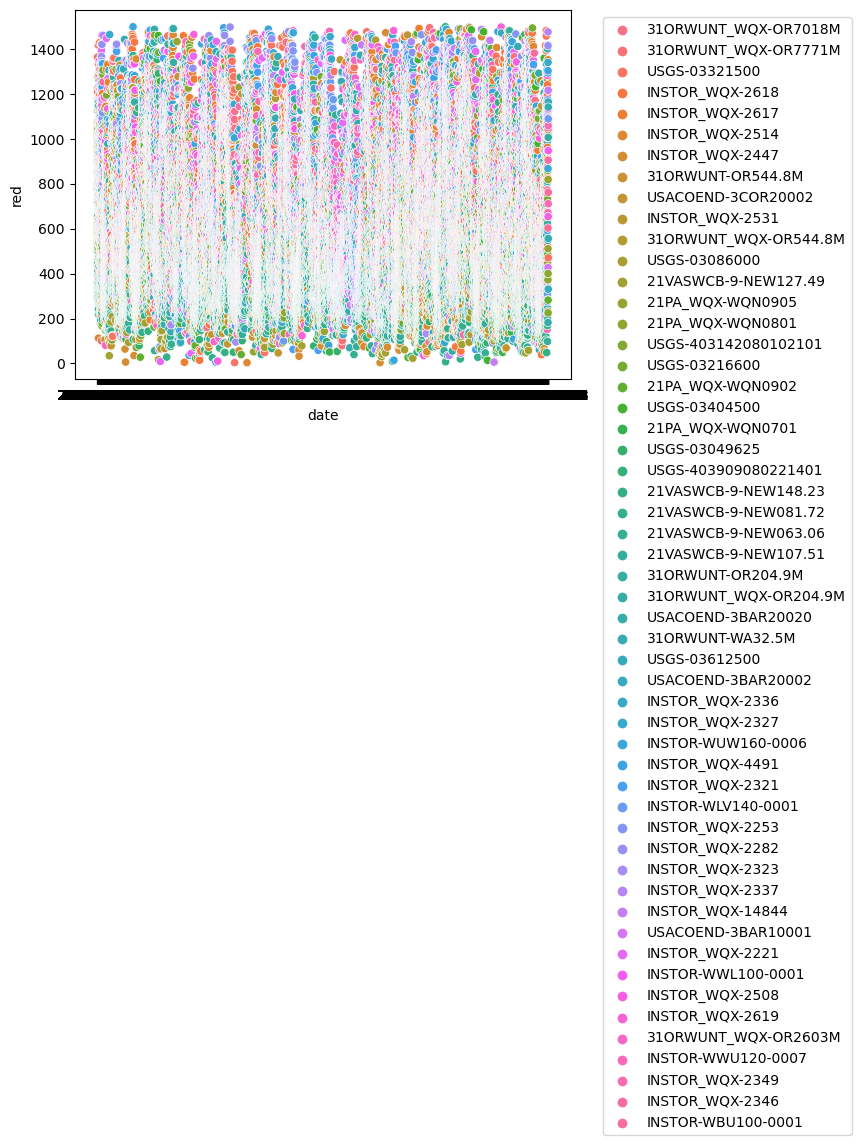

In [11]:
#Generate a first look Plot
# plot = sns.scatterplot(data=fusion, x="date", y="red", hue="SiteID")
# plt.legend(fontsize='6')

# sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
# plot

In [12]:
#Matchups
#bring in WQP cleaned data
huc5 = pd.read_csv(r'notAquasat_huc5_5.csv')
huc5['tss'] = huc5['value']
huc5['month'] = pd.to_datetime(huc5['date'], format = '%Y-%m-%d').dt.month
print(huc5.columns.values.tolist())
print(len(huc5.index))
print(huc5['units'].unique())

#site = huc5[huc5['SiteID'] == 'INSTOR_WQX-2221'] #'USGS-03049625']
#site = site[site['date'] > '2000-01-01']
#print(site)
print(huc5.sort_values(by = 'date'))

['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss', 'month']
132346
['%' 'mg/l']
        Unnamed: 0                               parameter units  \
17901        17902  Suspended Sediment Concentration (SSC)  mg/l   
18588        18589  Suspended Sediment Concentration (SSC)  mg/l   
71551        71552                  Total suspended solids  mg/l   
71208        71209                  Total suspended solids  mg/l   
17911        17912  Suspended Sediment Concentration (SSC)  mg/l   
...            ...                                     ...   ...   
35180        35181                  Total suspended solids  mg/l   
120981      120982                  Total suspended solids  mg/l   
34156        34157                  Total suspended solids  mg/l   
34741        34742                  Total suspended solids  mg/l   
35175        35176                  Total suspende

/scratch/ceewater-cpu001/5659315/ipykernel_2076140/848293820.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  huc5 = pd.read_csv(r'notAquasat_huc5_5.csv')


In [10]:
#Rename columns and merge huc5 and fusion
# huc5['tss'] = huc5['value']

# huc5 = huc5[['SiteID', 'tss', 'date', 'year']]

# fusionMerge = pd.merge(df, huc5, on =['SiteID', 'date'], how ="inner")
# fusionMerge['SiteID'].unique()
# fusionMerge.drop_duplicates()

# #Add a transformation

# fusionMerge['R_GB_log'] = np.log(fusionMerge['R_GB'])
# fusionMerge['tss_log'] = np.log(fusionMerge['tss'])


# Matchup +/- 1 day

In [13]:
#Merge data +/- 1 day
#sort the dataframes
huc5 = huc5.sort_values(by = 'date')
huc5['date'] = pd.to_datetime(huc5['date'], format = '%Y-%m-%d')
huc5 = huc5[huc5['units'] == 'mg/l']

huc5Merge = huc5.drop(['month', 'year'], axis=1)

fusion = fusion.sort_values(by = 'date')
fusion['date'] = pd.to_datetime(fusion['date'], format = '%Y-%m-%d')


fusionMerge_timediff = pd.merge_asof(huc5Merge, fusion, on = 'date', by ='SiteID',
                                 tolerance=pd.Timedelta(1, "d"),
                                 allow_exact_matches=True).dropna(subset = 'red')

#fusionMerge_timediff['red_log'] = np.log10(fusionMerge_timediff['red'])
#fusionMerge_timediff['tss'] = np.log(fusionMerge_timediff['tss_x'])

fusionMerge_timediff['tss_log'] = np.log10(fusionMerge_timediff['tss'])
fusionMerge_timediff['B_RG_log'] = np.log10(fusionMerge_timediff['B_RG'])

# print the variable
print(fusionMerge_timediff.columns.values.tolist())
print('# of Matchups Across all Sites:', len(fusionMerge_timediff.index))

#get siteID's
fusionSites = list(fusionMerge_timediff.SiteID.unique())
print(fusionSites)

['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'tss', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'Matchup', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'tss_log', 'B_RG_log']
# of Matchups Across all Sites: 1178
['INSTOR_WQX-2531', 'USGS-03612500', 'USGS-03049625', 'INSTOR_WQX-2617', 'INSTOR_WQX-2619', 'INSTOR_WQX-2514', 'INSTOR_WQX-2508', 'INSTOR-WWL100-0001', 'INSTOR_WQX-2323', 'INSTOR-WLV140-0001', 'INSTOR_WQX-2327', 'INST

<AxesSubplot: xlabel='nir', ylabel='tss'>

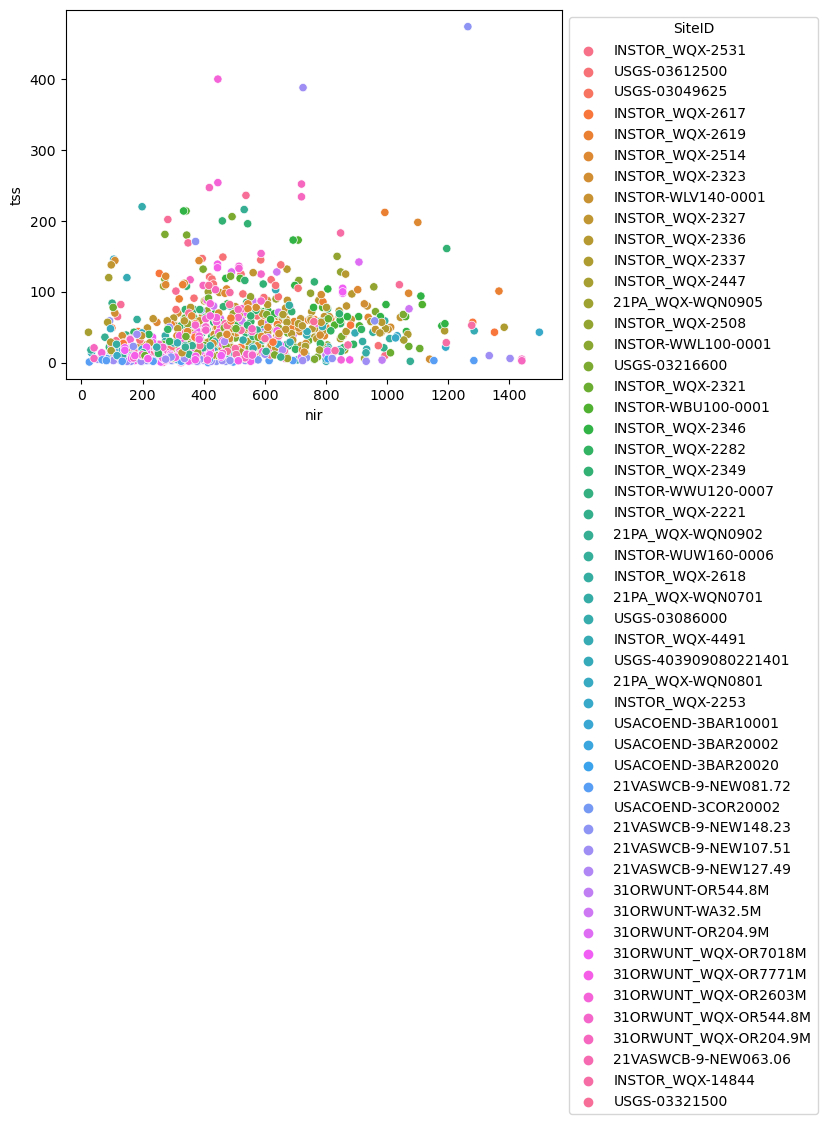

In [14]:
#Generate Plot
#Generate Plot

fusionMerge_timediffP = fusionMerge_timediff[(fusionMerge_timediff.red < 1100)]
plot = sns.scatterplot(data=fusionMerge_timediffP, x="nir", y="tss", hue="SiteID")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

In [15]:
huc5_aquaSites = huc5[huc5['SiteID'].isin(fusionSites)]
huc5_aquaSites = huc5_aquaSites[huc5_aquaSites['units'] == 'mg/l']
print(huc5_aquaSites.describe())


          Unnamed: 0          lat         long        value         year  \
count    7305.000000  7305.000000  7305.000000  7305.000000  7305.000000   
mean    76732.562491    39.162640   -85.467455    52.394728  2004.922656   
std     31766.146805     1.218478     2.794971    74.608824     8.147390   
min      7349.000000    36.296390   -89.041737     0.100000  1984.000000   
25%     57677.000000    38.511254   -87.395821    12.000000  1999.000000   
50%     82561.000000    39.200368   -86.705556    31.000000  2004.000000   
75%     95592.000000    40.411819   -84.170833    65.000000  2010.000000   
max    132322.000000    40.766100   -79.772548  1840.000000  2021.000000   

               tss        month  
count  7305.000000  7305.000000  
mean     52.394728     6.317180  
std      74.608824     3.348998  
min       0.100000     1.000000  
25%      12.000000     3.000000  
50%      31.000000     6.000000  
75%      65.000000     9.000000  
max    1840.000000    12.000000  


<AxesSubplot: xlabel='year', ylabel='tss'>

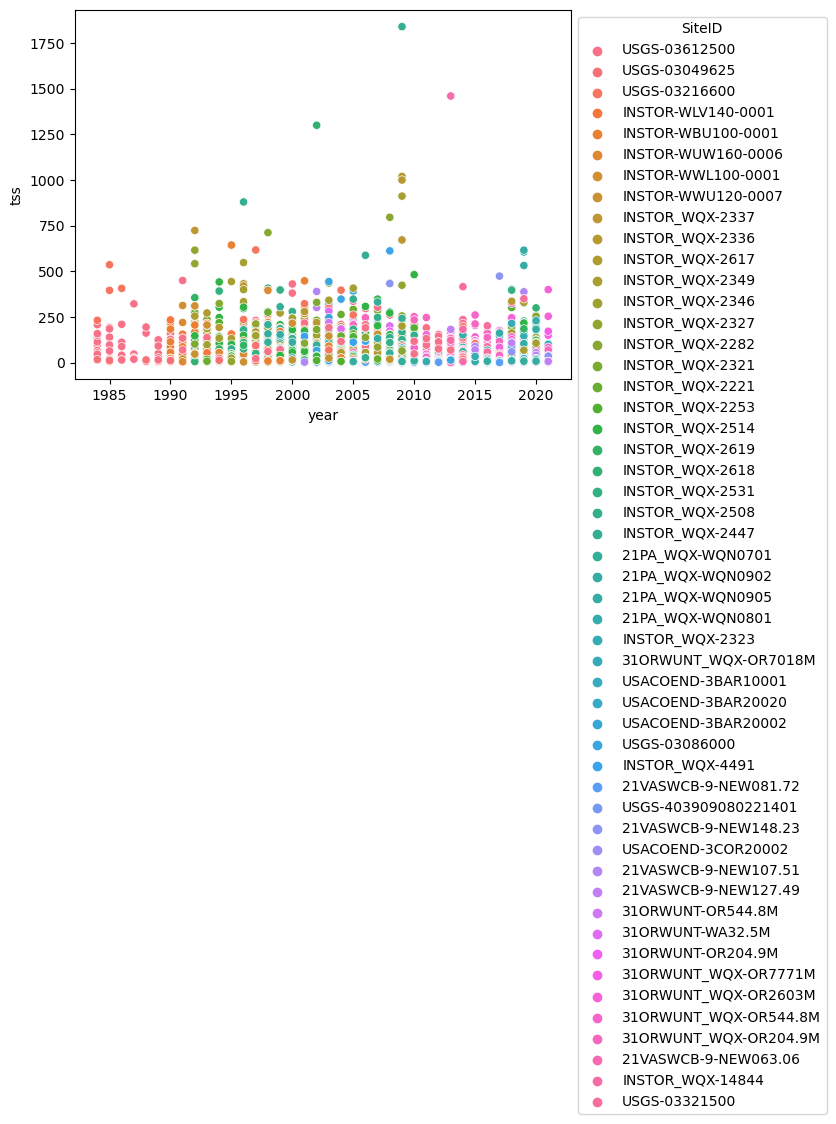

In [16]:
plot = sns.scatterplot(data=huc5_aquaSites, x="year", y="tss", hue="SiteID")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

# No Matchup

In [17]:
#All unmatched fusion

fusionMerge_timediff_cute = fusionMerge_timediff [['SiteID', 'date']]

fusUnmatched = pd.merge(fusionMerge_timediff_cute, fusion, on =['SiteID', 'date'], how ="outer")
#Filtered
#fusUnmatched = fusUnmatched[(fusUnmatched.R_GB < 1.0)] #& (aquaFusion.tss < 150)

fusUnmatched['Matchup'] = 'Fusion No Matchup'
print('All Site Fusion Unmatched Huc5:', len(fusUnmatched.index))
fusUnmatched_fusionSites = fusUnmatched[fusUnmatched['SiteID'].isin(fusionSites)]
print('Unmatched Fusion Sites:', len(fusUnmatched_fusionSites.index))

#All unmatched WQP

fusionMerge_timediff_cute = fusionMerge_timediff [['SiteID', 'date']]

wqpUnmatched = pd.merge(fusionMerge_timediff_cute, huc5, on =['SiteID', 'date'], how ="outer")
wqpUnmatched['Matchup'] = 'WQP'
print('All WQP Unmatched Huc5:', len(wqpUnmatched.index))
wqpUnmatched_fusionSites = wqpUnmatched[wqpUnmatched['SiteID'].isin(fusionSites)]
print('Unmatched WQP Sites Current Subset:', len(wqpUnmatched_fusionSites.index))



All Site Fusion Unmatched Huc5: 64841
Unmatched Fusion Sites: 63492
All WQP Unmatched Huc5: 125263
Unmatched WQP Sites Current Subset: 7541


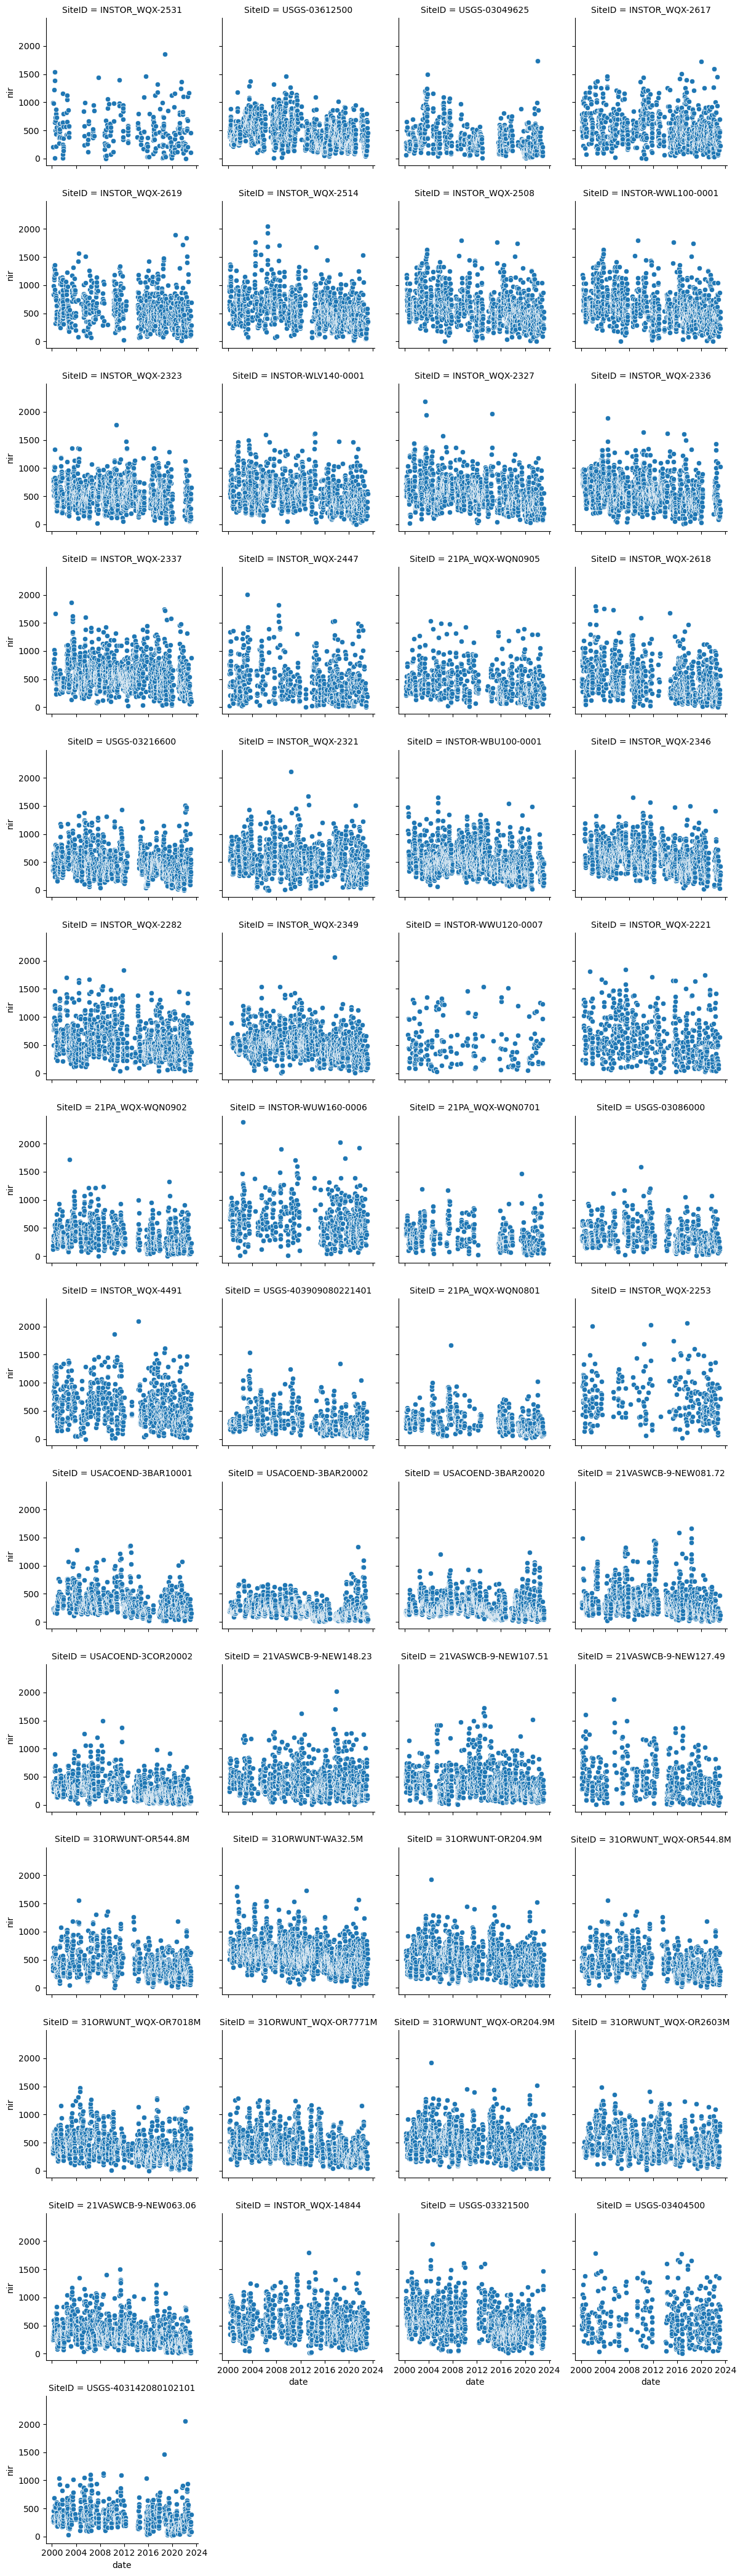

In [18]:
#Generate Plot

g = sns.FacetGrid(fusUnmatched, col="SiteID", col_wrap = 4)
g.map_dataframe(sns.scatterplot, x="date", y="nir")
g.add_legend()

# plot = sns.scatterplot(data=fusUnmatched, x="date", y="R_GB", hue="SiteID")
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plot

# Aquasat

In [19]:
#Read in aquasat
aquaHuc5 = pd.read_csv(r'aquasatHLS_huc5_ratio.csv')
aquaHuc5.columns = aquaHuc5.columns.str.replace("[.]", "_")

#Add a transformation
aquaHuc5 = aquaHuc5[aquaHuc5['units'] == 'mg/l']
aquaHuc5['R_GB_log'] = np.log10(aquaHuc5['R_GB'])
aquaHuc5['tss_log'] = np.log10(aquaHuc5['tss'])
#aquaHuc5['B_RG_log'] = np.log10(aquaHuc5['B_RG'])
aquaHuc5['RN2'] = ((aquaHuc5['red'] + aquaHuc5['nir']) / 2)
aquaHuc5['Matchup'] = 'AquaSat'
aquaHuc5['date'] = pd.to_datetime(aquaHuc5['date'])
aquaHuc5['date'] = pd.to_datetime(aquaHuc5['date'], format = "%m/%d/%Y").dt.strftime("%Y-%m-%d")
aquaHuc5['year'] = pd.to_datetime(aquaHuc5['date']).dt.year
print(aquaHuc5.columns.values.tolist())

['Unnamed: 0_2', 'Unnamed: 0_1', 'Unnamed: 0', 'X_1', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time_x', 'date_time', 'hydroCondition', 'hydroEvent', 'X', 'system_index', 'SiteID_y', 'blue', 'blue_sd', 'date_unity', 'green', 'green_sd', 'nir', 'nir_sd', 'path', 'pixelCount', 'qa', 'qa_sd', 'red', 'red_sd', 'row', 'sat', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', '_geo', 'endtime', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'source', 'TZID', 'date_utc', 'clouds', 'time_y', 'landsat_id', 'timediff', 'pwater', 'type', 'id', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sceneID', 'tss_log'

/scratch/ceewater-cpu001/5659315/ipykernel_2076140/1285605283.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  aquaHuc5.columns = aquaHuc5.columns.str.replace("[.]", "_")


435


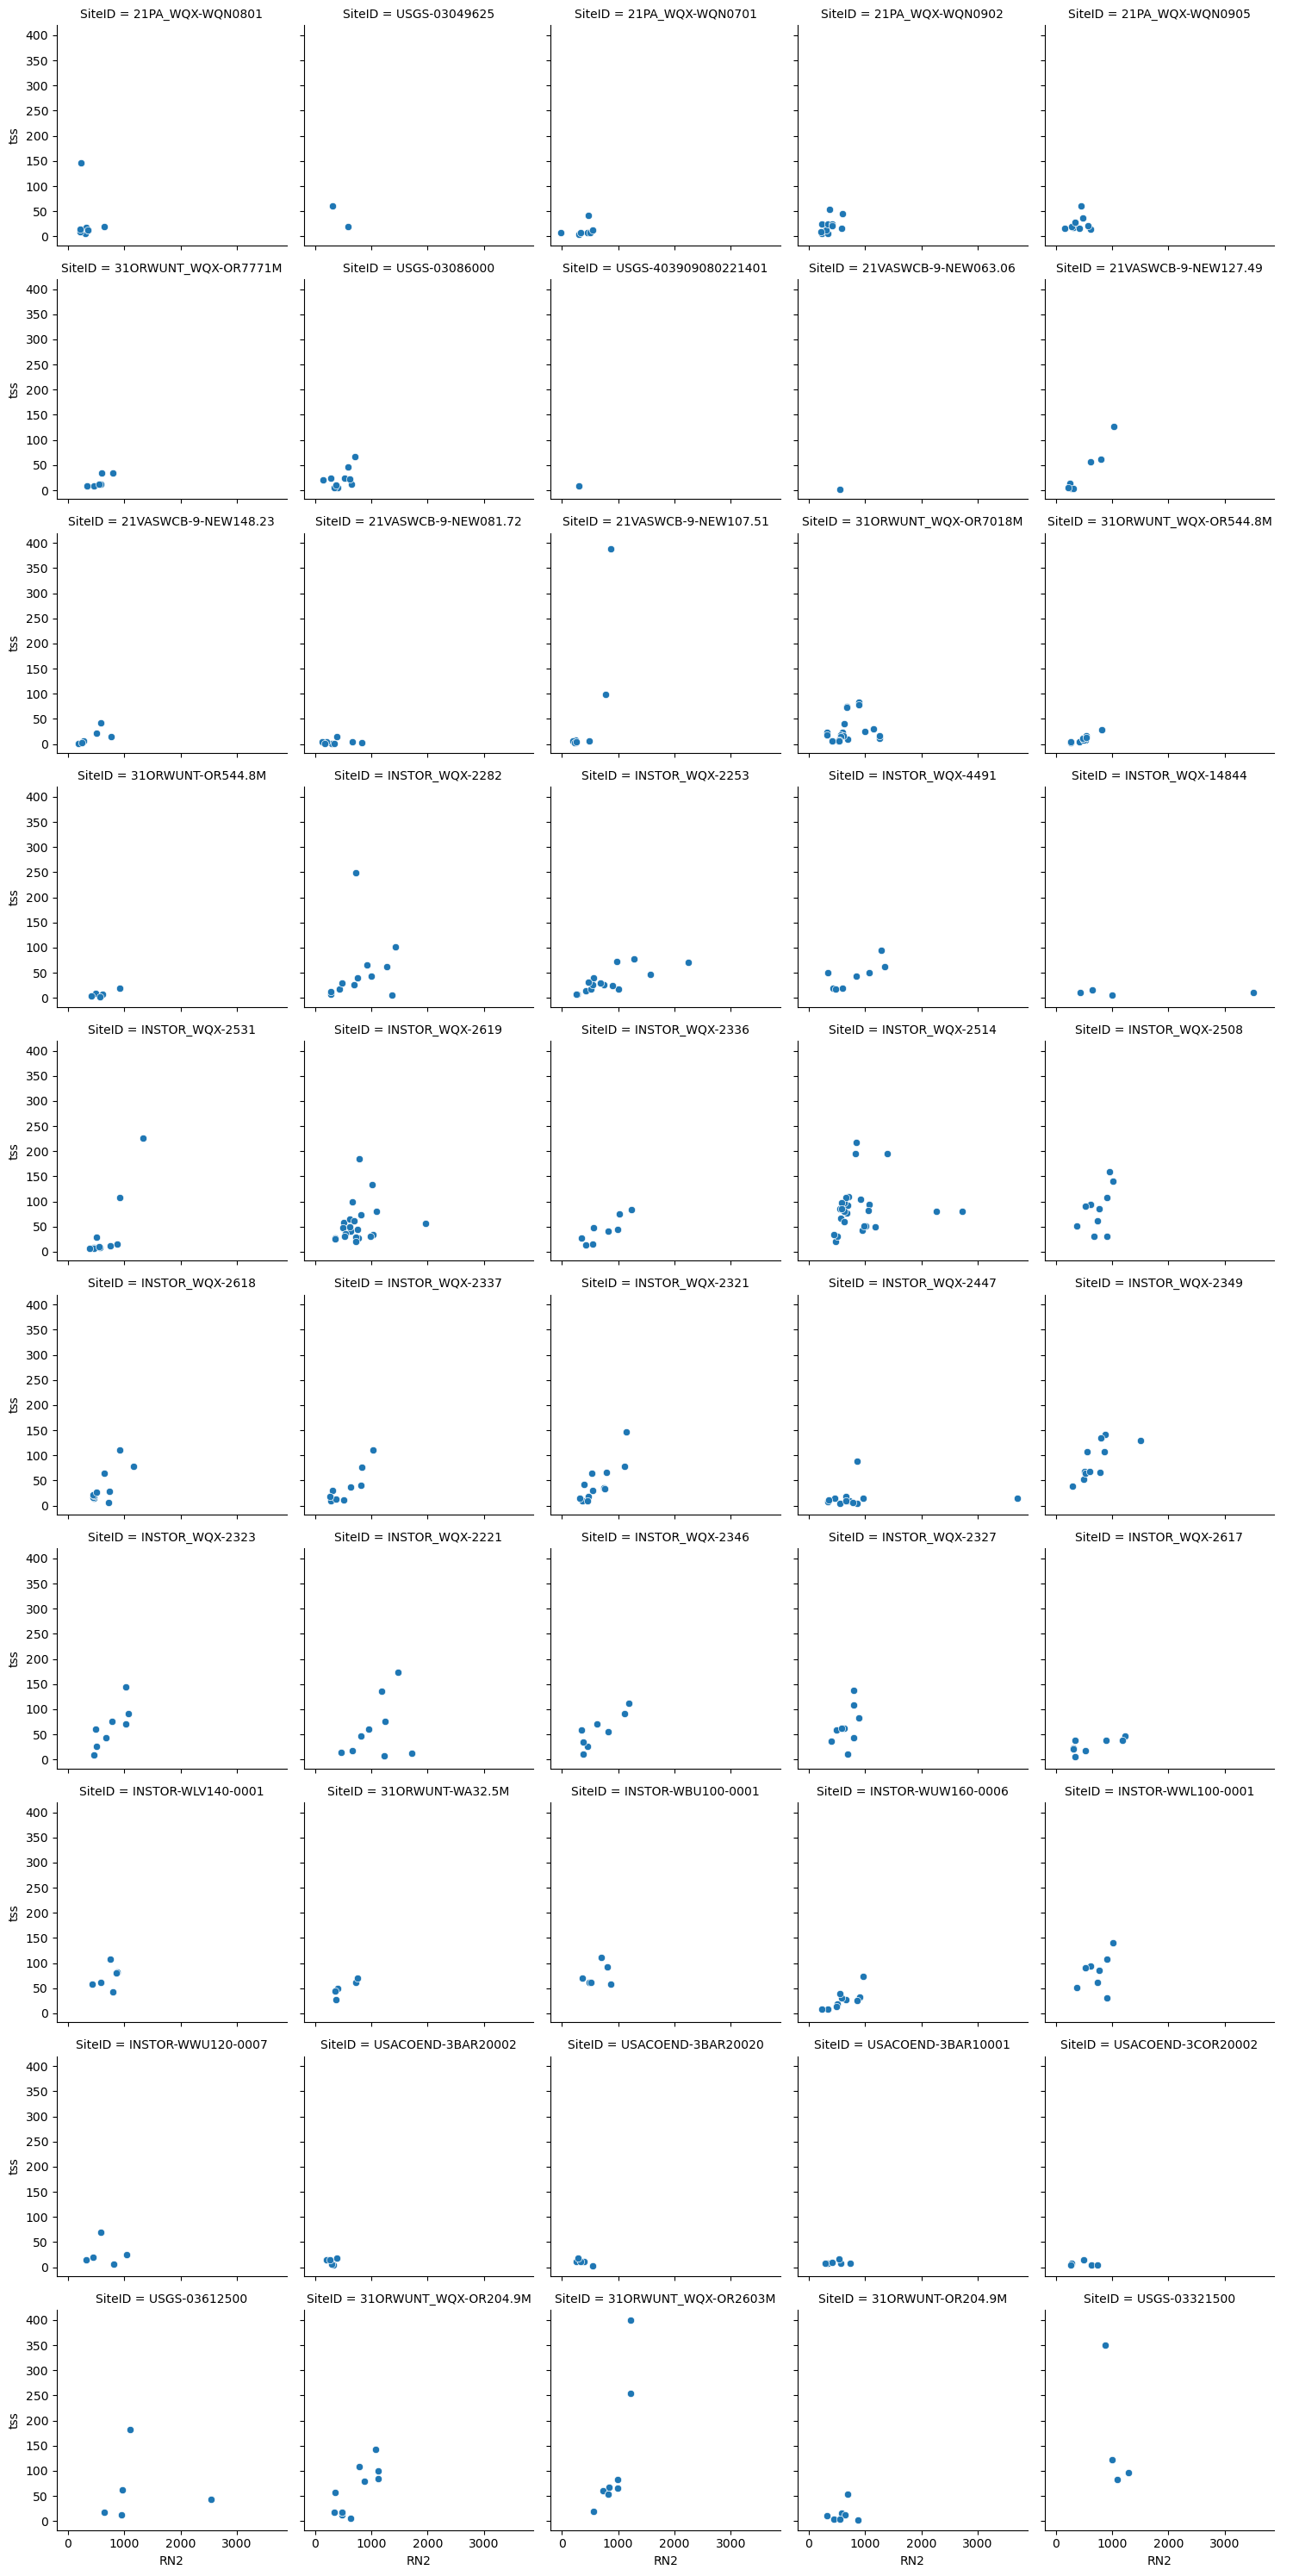

In [20]:
#Generate Plot
#Generate Plot Aquasat
# plot = sns.scatterplot(data=aquaHuc5, x="date", y="tss", hue="SiteID")
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plot

aquaHuc5_fusionSites = aquaHuc5[aquaHuc5['SiteID'].isin(fusionSites)]
print(len(aquaHuc5_fusionSites.index))

g = sns.FacetGrid(aquaHuc5_fusionSites, col="SiteID", col_wrap = 5)
g.map_dataframe(sns.scatterplot, x="RN2", y="tss")
g.add_legend()

In [21]:
#AquaFusion data
aquaHuc5 = aquaHuc5[['SiteID', 'particle_size', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn']]


#Fuse data
aquaFusion = pd.concat([fusionMerge_timediff, aquaHuc5]).dropna(subset='red').drop_duplicates(subset = ['SiteID', 'date'])
aquaFusion['date'] = pd.to_datetime(aquaFusion['date'])
aquaFusion['month'] = pd.to_datetime(aquaFusion['date']).dt.month
aquaFusion['year'] = pd.to_datetime(aquaFusion['date']).dt.year
aquaFusion['day'] = pd.to_datetime(aquaFusion['date']).dt.day
aquaFusion['R_GB_log'] = np.log10(aquaFusion['R_GB'])
aquaFusion['tss_log'] = np.log10(aquaFusion['tss'])



aquaFusion = aquaFusion[aquaFusion['SiteID'].isin(fusionSites)]
print(len(aquaFusion.index))
print(aquaFusion.Matchup.value_counts())
print(aquaFusion.columns.values.tolist())
#print(aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2282'])

#aquaFusion.to_csv(r'r_gb_aquaFusion_16Sites_12_2022.csv')

1496
fusion     1084
AquaSat     412
Name: Matchup, dtype: int64
['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'tss', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'Matchup', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'tss_log', 'B_RG_log', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'timediff', 'day', 'R_GB_log']


<AxesSubplot: xlabel='B_RG_log', ylabel='tss'>

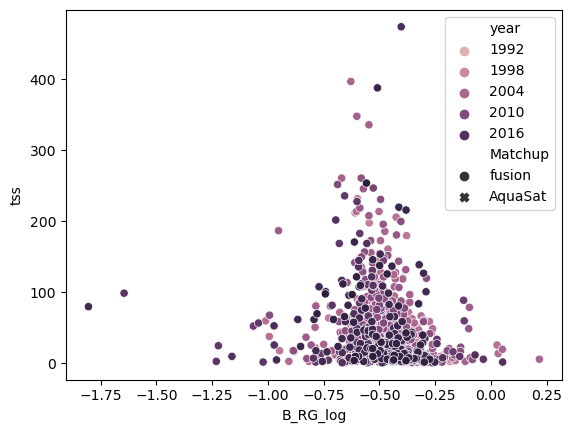

In [22]:
plot = sns.scatterplot(data=aquaFusion, x="B_RG_log", y="tss", 
                       legend = 'brief', hue="year", style = 'Matchup')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.legend(fontsize='10')
plot#.set(xlim = (0, 2500), ylim = (0,2500))

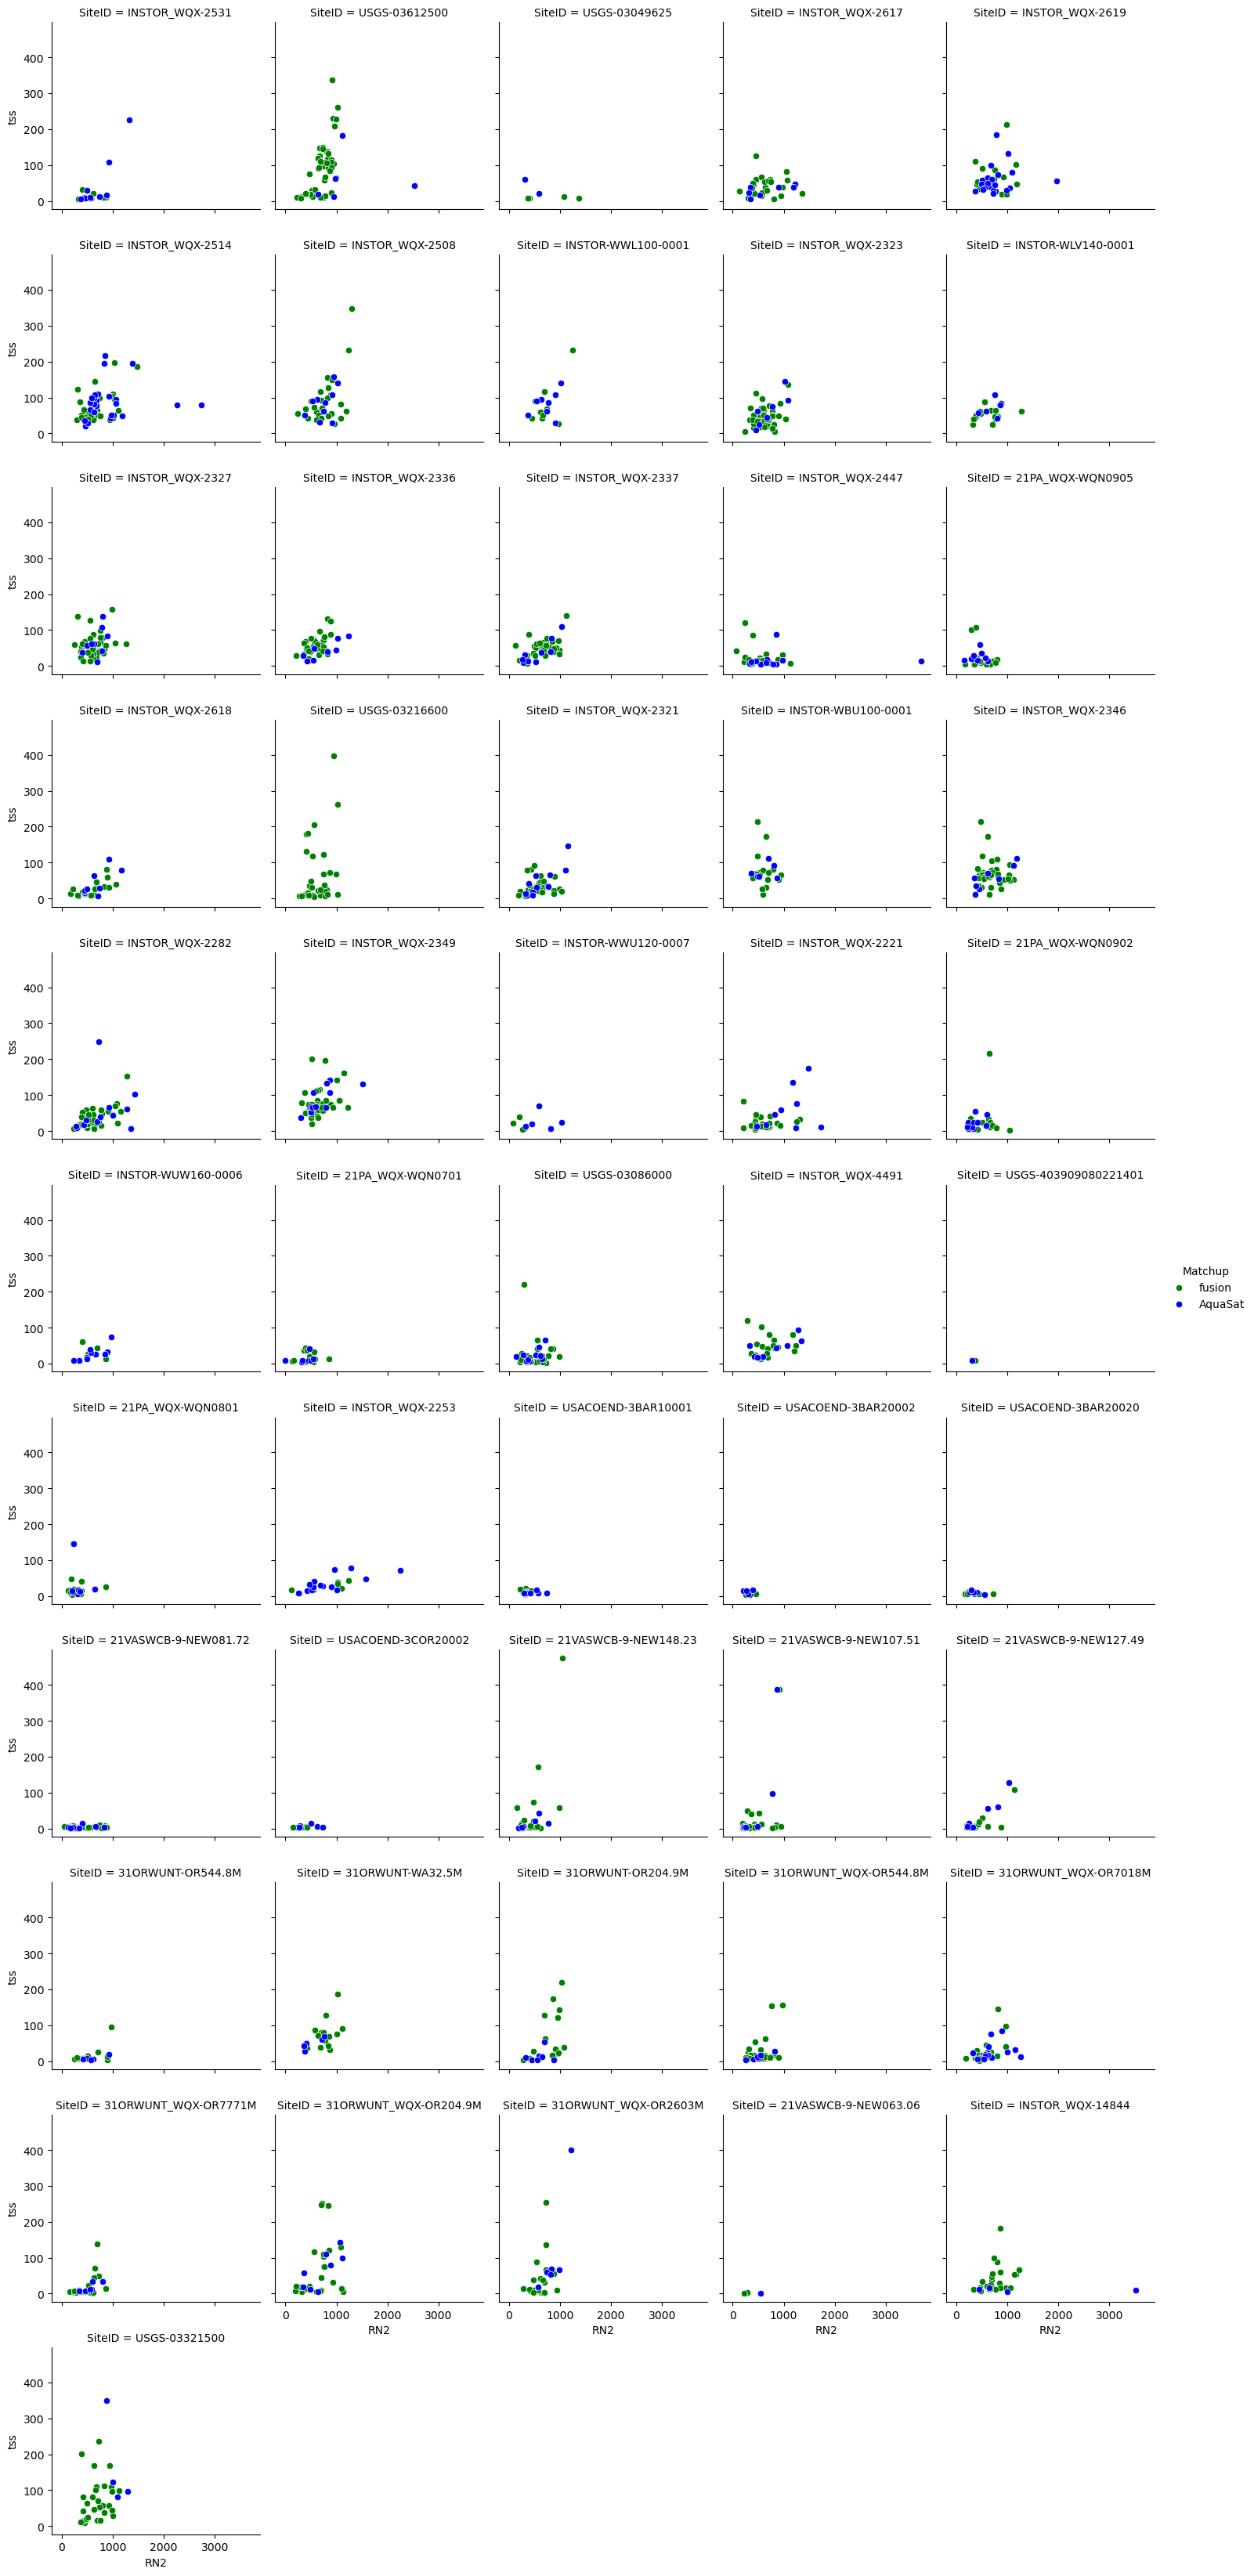

In [23]:
g = sns.FacetGrid(aquaFusion, col="SiteID", col_wrap = 5, hue = 'Matchup', palette = ['green', 'blue'])
g.map_dataframe(sns.scatterplot, x="RN2", y="tss")
g.add_legend()

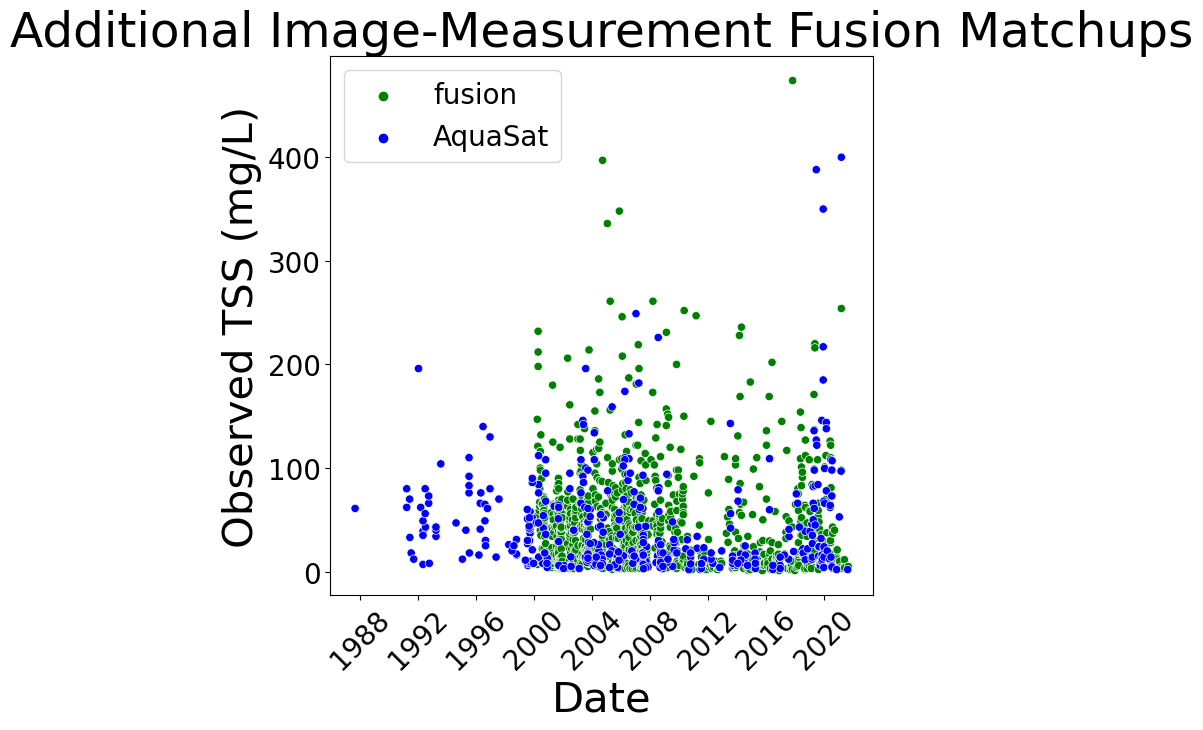

In [24]:
plt.figure(figsize=(7,7))
aquaFusSite = aquaFusion[(aquaFusion.SiteID == 'USGS-03086000')]
g = sns.scatterplot(aquaFusion, x="date", y="tss", hue = 'Matchup', palette = ['green', 'blue'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Observed TSS (mg/L)', fontsize=30)
plt.title('Additional Image-Measurement Fusion Matchups', fontsize = 35)
plt.legend(fontsize = 20, loc = 'upper left')
plt.tick_params(axis='x', labelsize=20, rotation = 45)
plt.tick_params(axis='y', labelsize=20)
plt.show()

AttributeError: 'FacetGrid' object has no attribute 'set_ylabel'

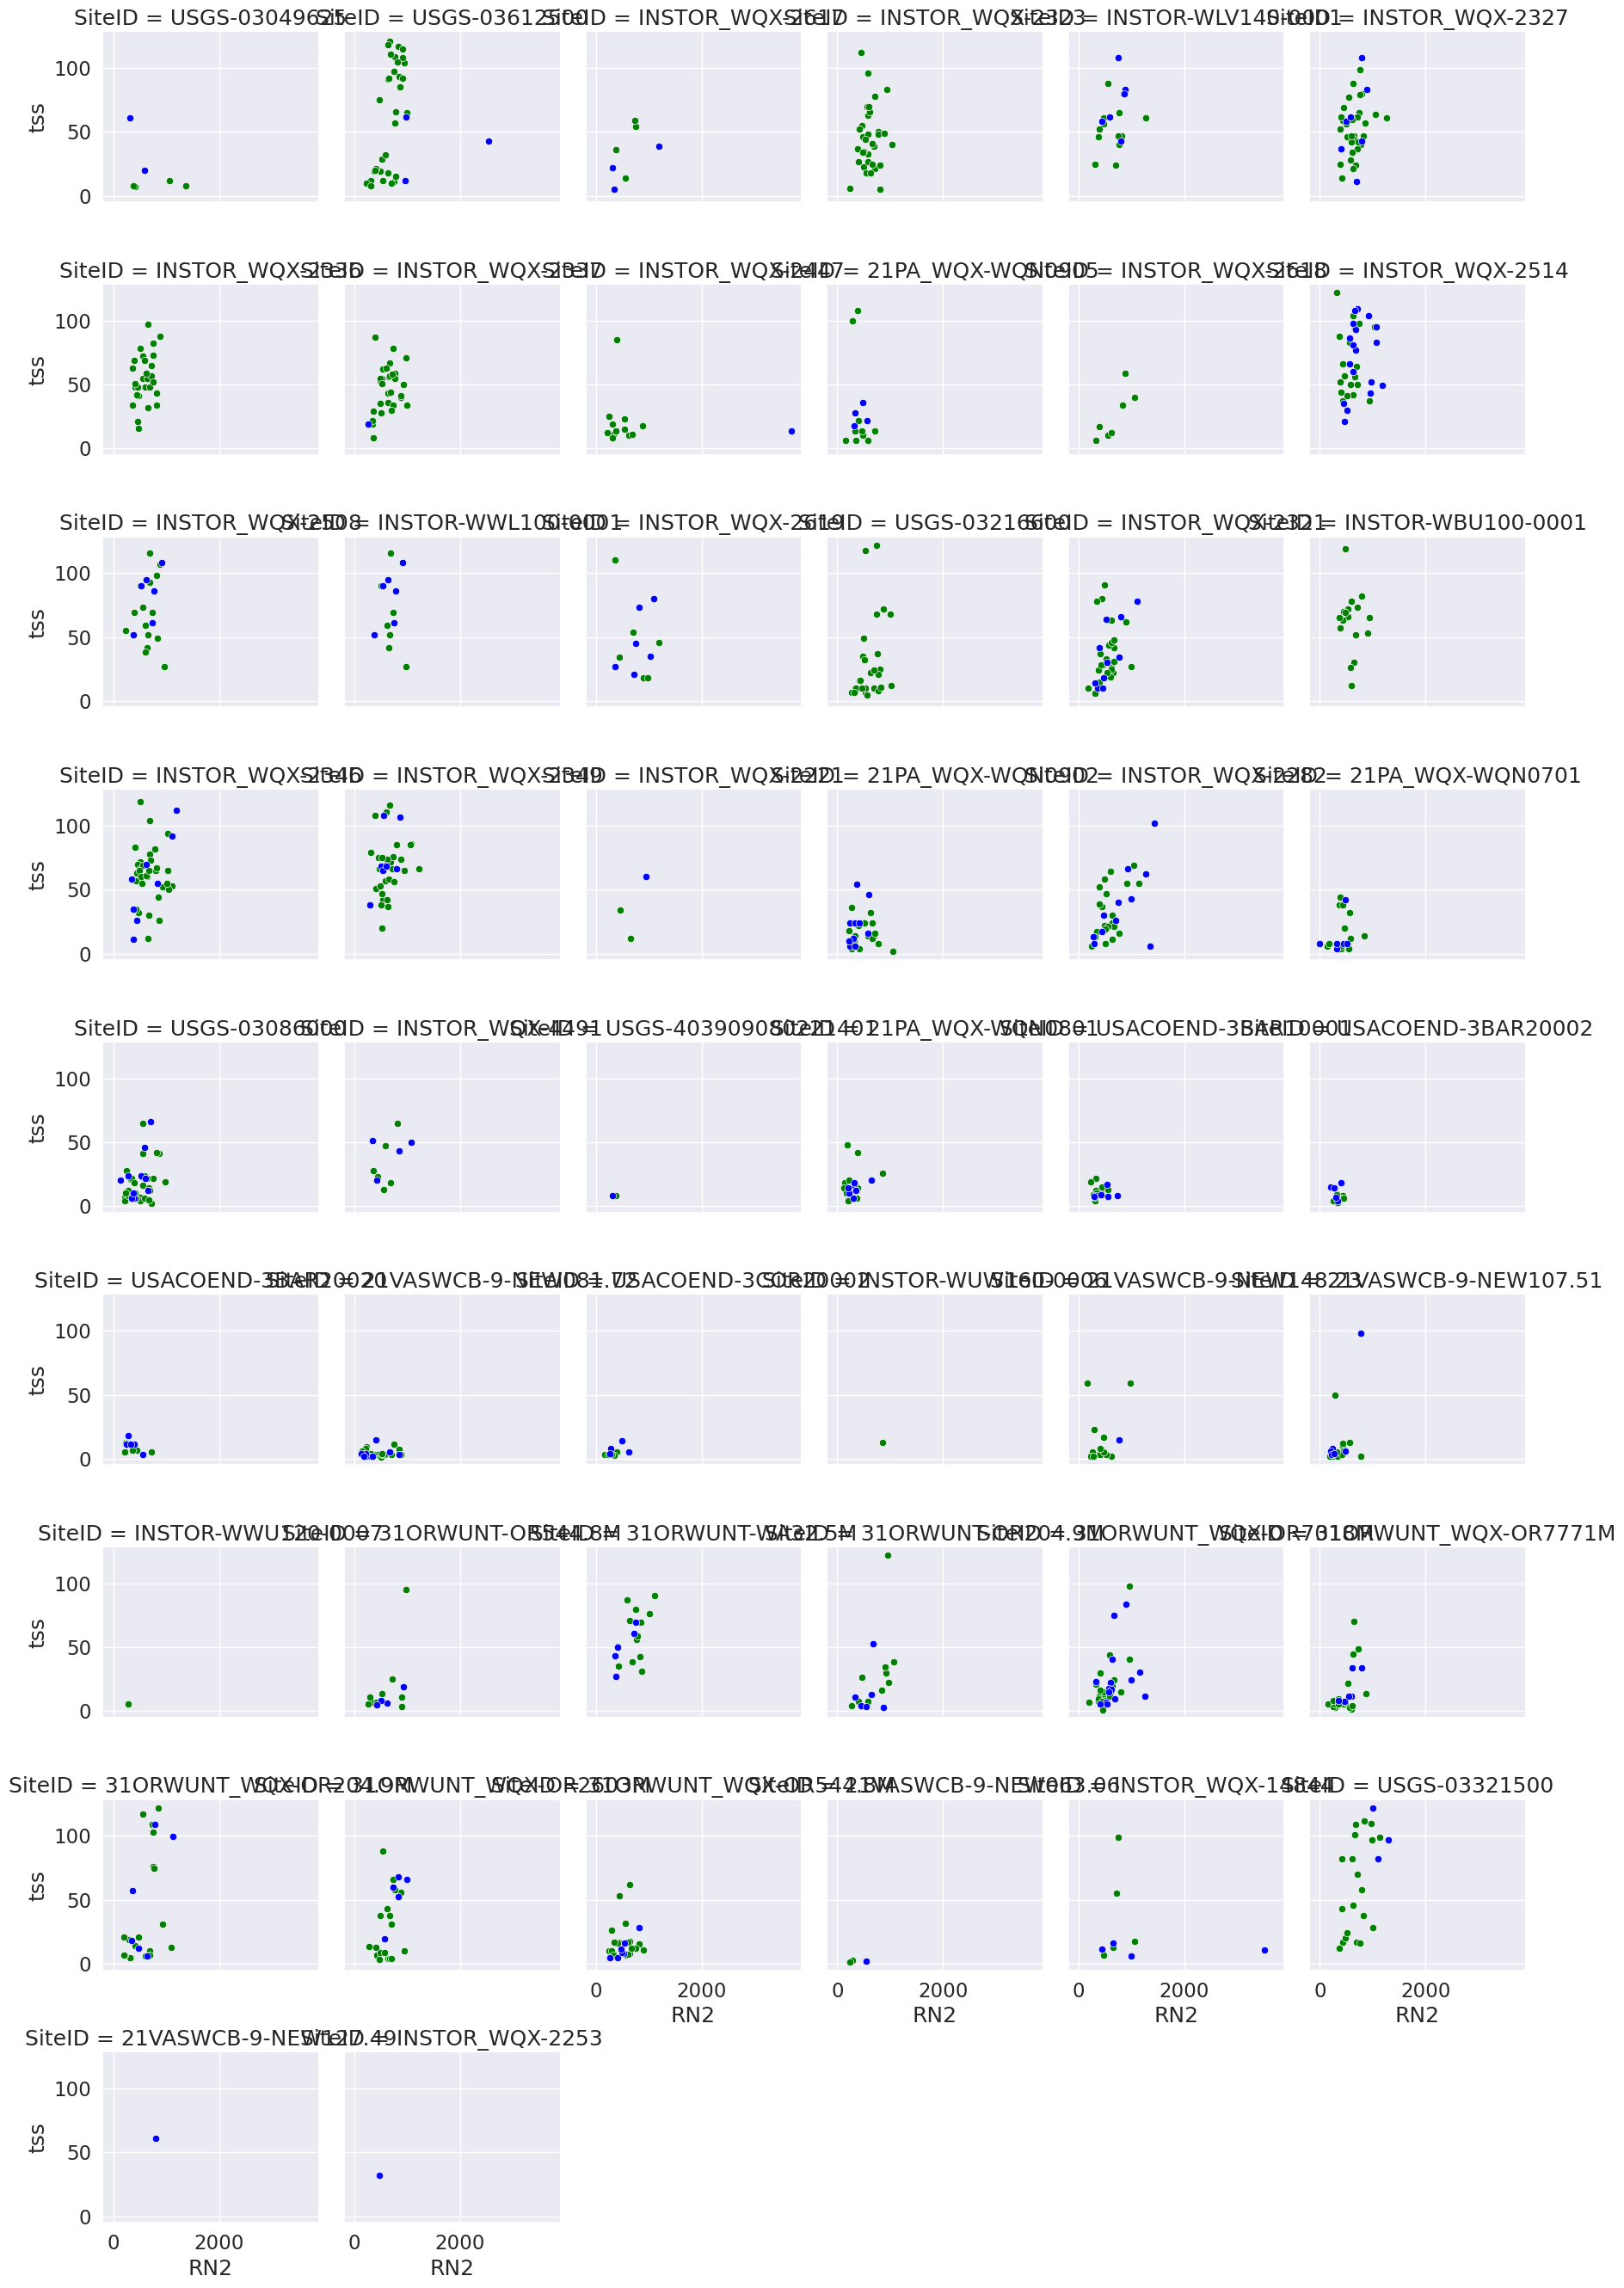

In [36]:
#CLEAN
aquaFusPlot = aquaFusion
aquaFusPlot = aquaFusion[(aquaFusion.tss < 125) & (aquaFusion.pixelCount > 10)] #(aquaFusion.SiteID != 'USGS-03086000') & (aquaFusion.R_GB > 0.3)& (aquaFusion.R_GB < 0.8) & 

g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup', col_wrap = 6, palette = ['green', 'blue'])
g.map_dataframe(sns.scatterplot, x="RN2", y="tss")
#g.set_xlabel('',fontsize=20);
g.set_ylabel('TSS (mg/L)',fontsize=20);
g.add_legend()
g.set_titles(size=12)

# plot = sns.scatterplot(data=aquaFusPlot, x="nir", y="tss", 
#                        hue="month", style = 'Matchup')
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plt.legend(fontsize='9')
# plot#.set(xlim = (0, 2500), ylim = (0,2500))


# plot = sns.scatterplot(data=aquaFusPlot, x="green", y="blue", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="SiteID")
# plt.legend(fontsize='10')
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
# plot

# Site Statistics - AquaFusWQP

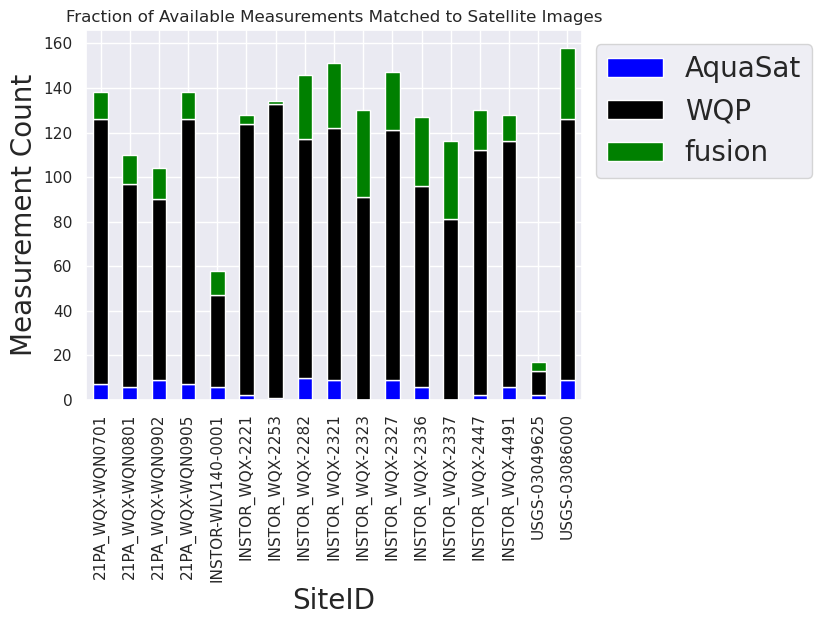

In [65]:
# print(aquaFusPlot.columns.values.tolist())
# print(wqpUnmatched.columns.values.tolist())

wqpUnmatched = wqpUnmatched[wqpUnmatched['SiteID'].isin(fusionSites)]#.drop_duplicates(subset = ['SiteID', 'date'])

aquaFusMerge = aquaFusPlot[['parameter','units','SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss', 'month', 'Matchup']]
huc5Merge = wqpUnmatched[['parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'tss', 'Matchup']]
huc5Merge = huc5Merge[(huc5Merge.date > '2000-01-01')] #& (huc5Merge.SiteID != 'USGS-03086000')
#aquaFusMerge = aquaFusMerge[(aquaFusMerge.SiteID != 'USGS-03086000')]


aquaFWqp = pd.concat([aquaFusMerge, huc5Merge]).drop_duplicates(subset = ['SiteID', 'date'])

aquaFWqp = aquaFWqp.groupby(['SiteID', 'Matchup'])['tss'].count().unstack()#.fillna(0)
aquaFWqp.plot(kind='bar', stacked=True, color = ['blue', 'black', 'green'])
plt.ylabel('Measurement Count', fontsize = '20')
plt.xlabel('SiteID', fontsize = '20')
plt.title('Fraction of Available Measurements Matched to Satellite Images')
#plt.tick_params(bottom=False, labelbottom=False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='20')

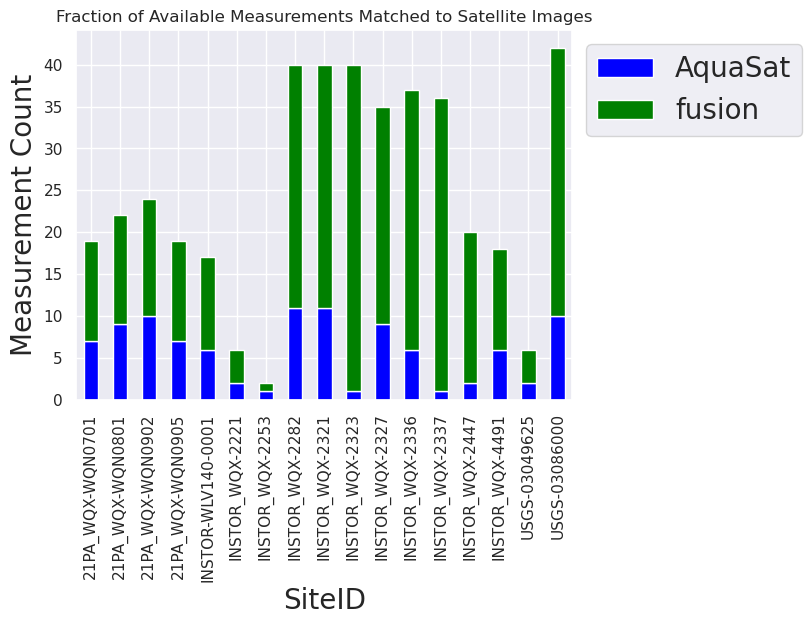

In [66]:
# print(aquaFusPlot.columns.values.tolist())
# print(wqpUnmatched.columns.values.tolist())

#wqpUnmatched = wqpUnmatched[wqpUnmatched['SiteID'].isin(fusionSites)]#.drop_duplicates(subset = ['SiteID', 'date'])

aquaFusMerge = aquaFusPlot[['parameter','units','SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss', 'month', 'Matchup']]
#huc5Merge = wqpUnmatched[['parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'tss', 'Matchup']]
#huc5Merge = huc5Merge[(huc5Merge.date > '2000-01-01')] #& (huc5Merge.SiteID != 'USGS-03086000')
#aquaFusMerge = aquaFusMerge[(aquaFusMerge.SiteID != 'USGS-03086000')]


#aquaFWqp = pd.concat([aquaFusMerge, huc5Merge]).drop_duplicates(subset = ['SiteID', 'date'])

aquaFWqp = aquaFusMerge.groupby(['SiteID', 'Matchup'])['tss'].count().unstack()#.fillna(0)
aquaFWqp.plot(kind='bar', stacked=True, color = ['blue', 'green'])
plt.ylabel('Measurement Count', fontsize = '20')
plt.xlabel('SiteID', fontsize = '20')
plt.title('Fraction of Available Measurements Matched to Satellite Images')
#plt.tick_params(bottom=False, labelbottom=False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='20')

# Model

## RF

In [ ]:
import numpy as np
import pandas as pd
from numpy import mean, arange
from numpy import std
import pprint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn import ensemble, datasets, tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# AquaFusion: Define a Training and Testing Set



(693, 62)
(298, 62)
(693,)
(298,)


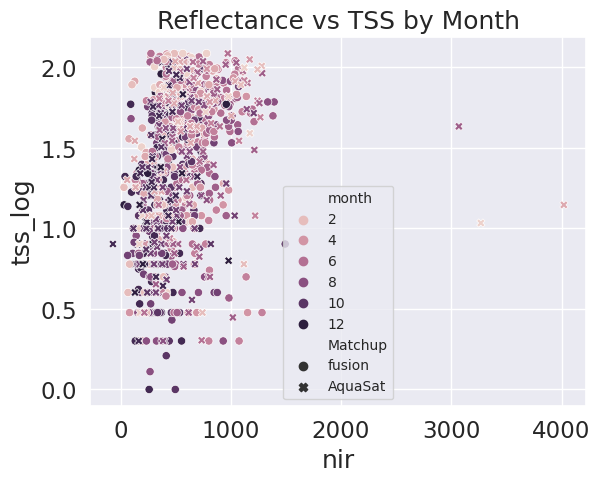

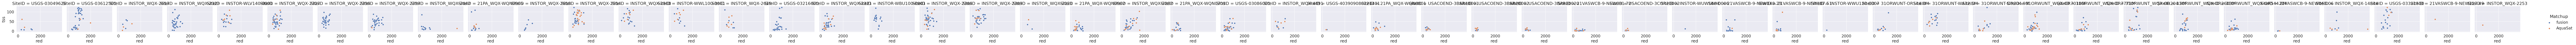

In [37]:
#hlsFusion = hlsFusion[(hlsFusion['tss'] < 200)] #& (hlsFusion['tss'] > 10)] 

#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']
labels = 'tss_log'
df= aquaFusPlot[['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'tss_log']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

#Plot
plot = sns.scatterplot(data=aquaFusPlot, x="nir", y="tss_log", 
                       legend = 'brief', 
                       style = 'Matchup', hue="month")
plt.legend(fontsize='10')
plt.title(label = 'Reflectance vs TSS by Month')
plot

sns.set(font_scale=1.5)
g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()


# Random Forest 1: No fit

In [38]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(10**(y_test), 10**(prediction)))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', RMSE_model)
print('Testing score', model.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(10**(prediction) - 10**(y_test))
print('MAE', (errors.mean()))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / 10**(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

Trained model oob score 0.35377439495690854
Training score 0.9095882540817726
RMSE 25.290352446619014
Testing score 0.4569958102330116
MAE 18.177079329878875
Accuracy: 13.45 %


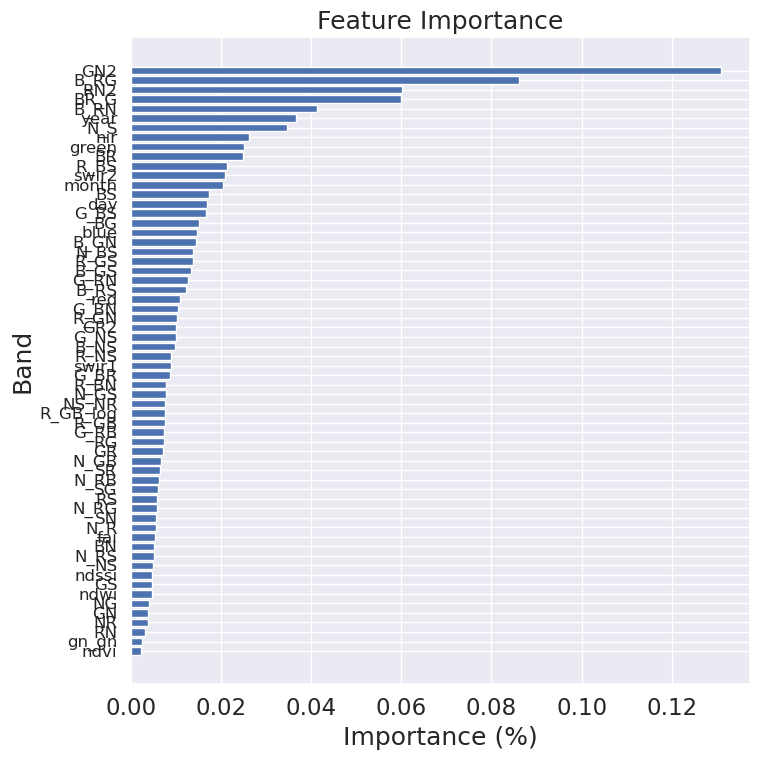

In [39]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


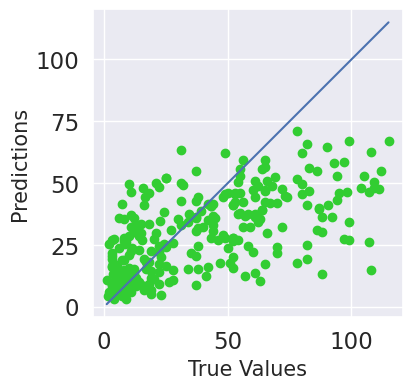

18.177079329878875


<AxesSubplot: >

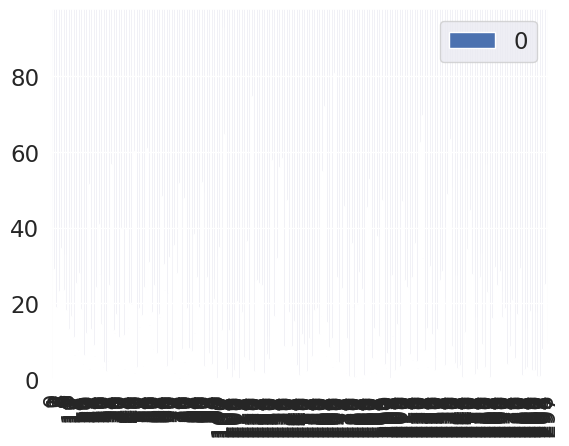

In [40]:
plt.figure(figsize=(4,4))
plt.scatter(10**(y_test), 10**(prediction), c='limegreen')

p1 = max(max(10**(prediction)), max(10**(y_test)))
p2 = min(min(10**(prediction)), min(10**(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(10**(prediction) - 10**(y_test))
print((errors.mean()))
pd.DataFrame((errors)).plot(kind='bar')

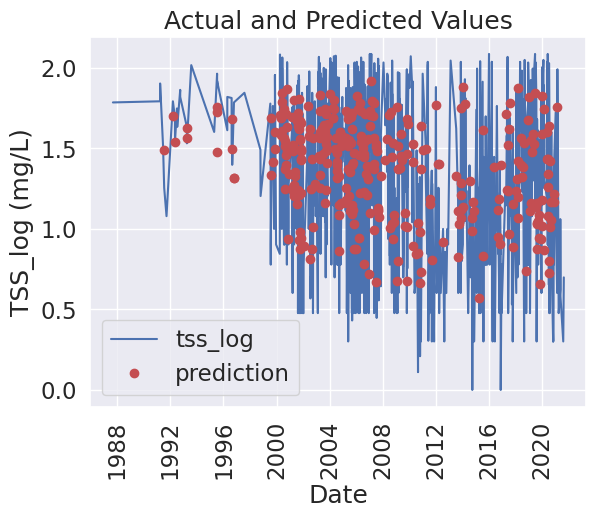

In [31]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

#PLOT
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 'vertical'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [112]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [113]:
# ###takes a lot of time. See results below.

# from sklearn.model_selection import GridSearchCV

# estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
# param_grid = {
#             "n_estimators" : [100, 150, 200, 300],
#             "max_features" : ["1.0", "log2", "sqrt"],
#             "max_depth"    : [1, 4, 7, 8, 10]
#         }


# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
# grid.fit(X_train, y_train)


# forest = grid.best_estimator_

# grid_prediction=forest.predict(X_test)

# print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

# mae_grid = mean_absolute_error(y_test, grid_prediction)
# RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

# print('MAE:', mae_grid)
# print('RMSE:', RMSE_model_grid)

# Fusion: Define a Training and Testing Set



(252, 62)
(64, 62)
(252,)
(64,)


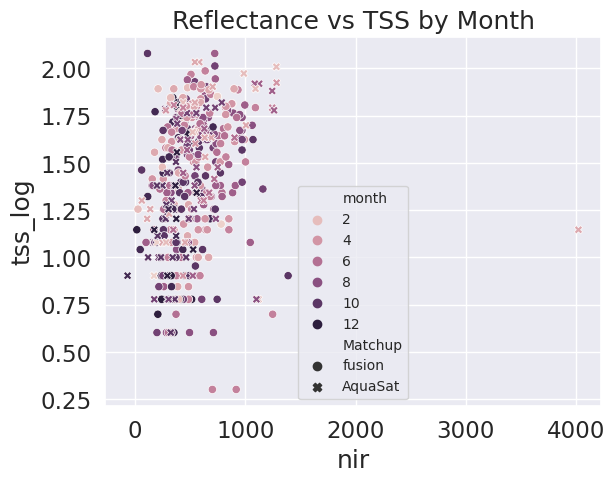

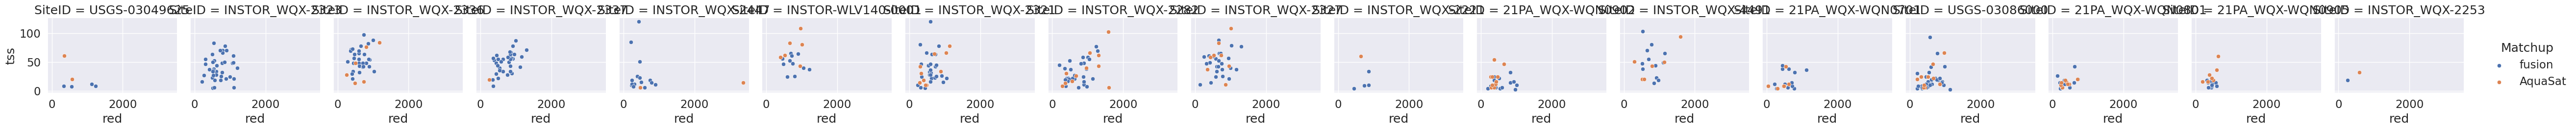

In [160]:
fusionRF = aquaFusPlot[(aquaFusPlot['Matchup'] == 'fusion')] #& (hlsFusion['tss'] > 10)] 

#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']
labels = 'tss_log'
df= fusionRF[['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'tss_log']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

#Plot
plot = sns.scatterplot(data=aquaFusPlot, x="nir", y="tss_log", 
                       legend = 'brief', 
                       style = 'Matchup', hue="month")
plt.legend(fontsize='10')
plt.title(label = 'Reflectance vs TSS by Month')
plot

sns.set(font_scale=1.5)
g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()


# Random Forest 1: No fit

In [161]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(10**(y_test), 10**(prediction)))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', RMSE_model)
print('Testing score', model.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(10**(prediction) - 10**(y_test))
print('MAE', (errors.mean()))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / 10**(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

Trained model oob score 0.09792594672198673
Training score 0.8847776531833564
RMSE 25.617601541352965
Testing score 0.1671069709434152
MAE 17.125756892264608
Accuracy: 32.21 %


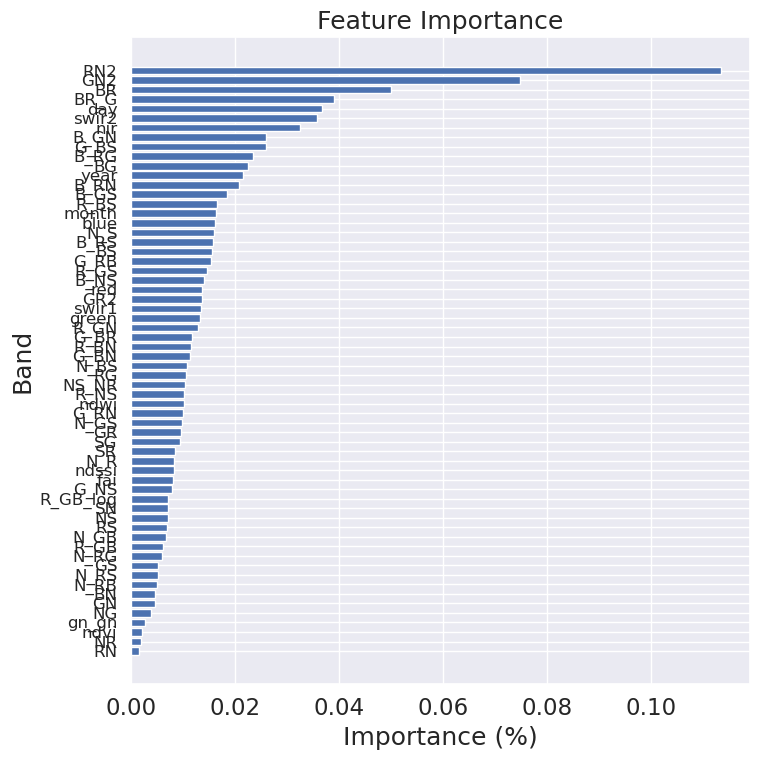

In [156]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


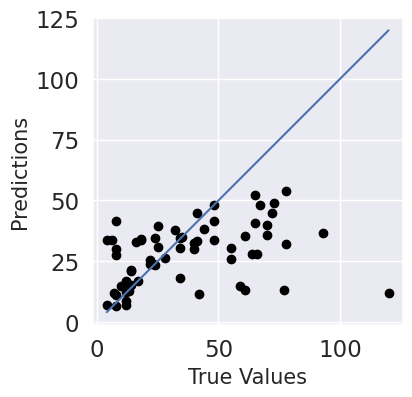

17.125756892264608


<AxesSubplot: >

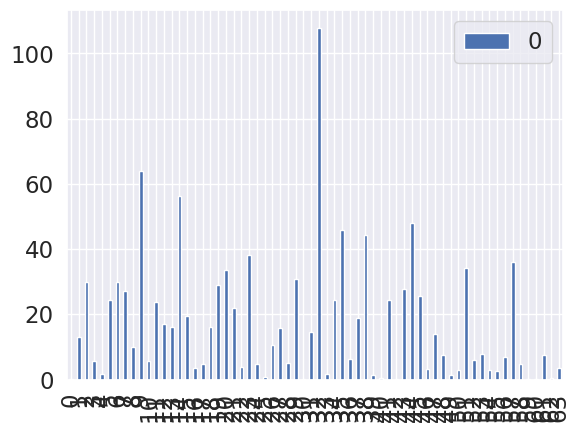

In [158]:
plt.figure(figsize=(4,4))
plt.scatter(10**(y_test), 10**(prediction), c='black')

p1 = max(max(10**(prediction)), max(10**(y_test)))
p2 = min(min(10**(prediction)), min(10**(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(10**(prediction) - 10**(y_test))
print((errors.mean()))
pd.DataFrame((errors)).plot(kind='bar')

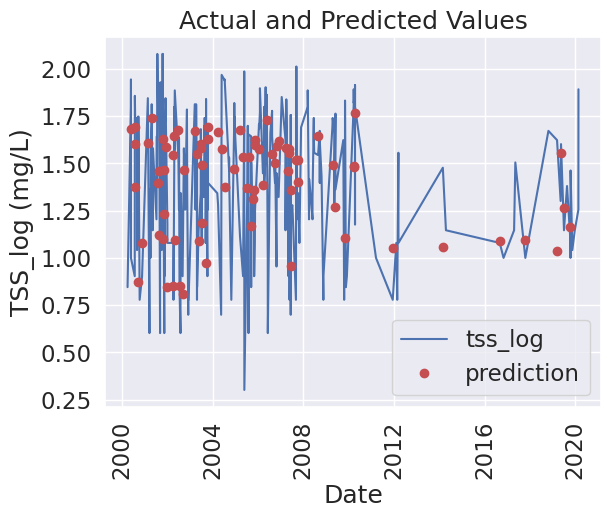

In [153]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

#PLOT
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 'vertical'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [112]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [113]:
# ###takes a lot of time. See results below.

# from sklearn.model_selection import GridSearchCV

# estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
# param_grid = {
#             "n_estimators" : [100, 150, 200, 300],
#             "max_features" : ["1.0", "log2", "sqrt"],
#             "max_depth"    : [1, 4, 7, 8, 10]
#         }


# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
# grid.fit(X_train, y_train)


# forest = grid.best_estimator_

# grid_prediction=forest.predict(X_test)

# print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

# mae_grid = mean_absolute_error(y_test, grid_prediction)
# RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

# print('MAE:', mae_grid)
# print('RMSE:', RMSE_model_grid)

# Aquasat Performance Using Fusion Sites Only

In [126]:
#AquaFusion data
aquaHuc5 = aquaHuc5[['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 
                     'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2',
                     'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 
                     'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG',
                     'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 
                     'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                     'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 
                     'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 
                     'gn_gn', 'RN2']]



aquaHuc5['month'] = pd.to_datetime(aquaHuc5['date']).dt.month
aquaHuc5['year'] = pd.to_datetime(aquaHuc5['date']).dt.year
aquaHuc5['day'] = pd.to_datetime(aquaHuc5['date']).dt.day
aquaHuc5['R_GB_log'] = np.log10(aquaHuc5['R_GB'])
aquaHuc5['tss_log'] = np.log10(aquaHuc5['tss'])

aquaHuc5_4Sites = aquaHuc5[aquaHuc5['SiteID'].isin(fusionSites)]
#aquaHuc5_4Sites = aquaHuc5_4Sites[(aquaHuc5_4Sites.SiteID != 'USGS-03086000')]

print(aquaHuc5_4Sites.columns.values.tolist())
print(len(aquaHuc5_4Sites.index))
print(len(aquaHuc5_4Sites.SiteID.unique()))

['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'RN2', 'month', 'day', 'R_GB_log', 'tss_log']
156
17


# Define a Training and Testing Set



In [127]:
#define a training and testing set

labels = 'tss_log'
df= aquaHuc5_4Sites[['blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 
                 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 
                 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 
                 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 
                 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 
                 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 
                 'month', 'day', 'R_GB_log', 'tss_log']].reset_index(drop=True) #[['year', 'R_GB',
                 #'month', 'R_GB_log', 'tss_log']].reset_index(drop=True) 


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
modelA = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

(288, 62)
(124, 62)
(288,)
(124,)


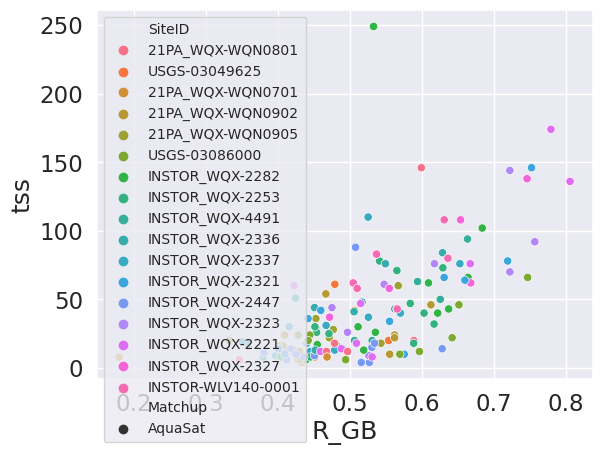

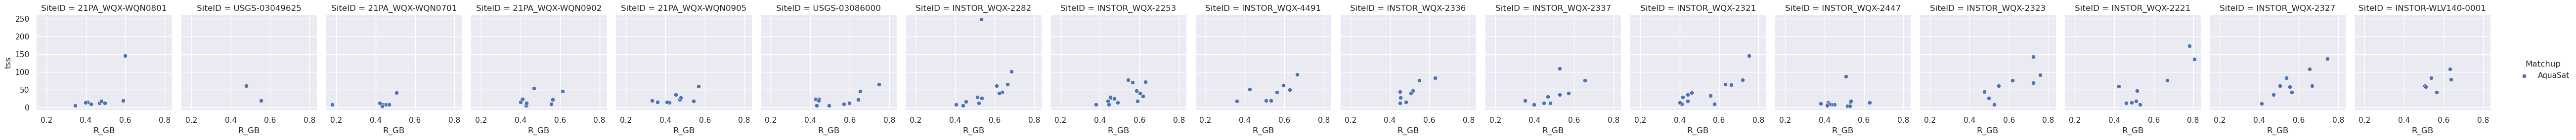

In [128]:
plot = sns.scatterplot(data=aquaHuc5_4Sites, x="R_GB", y="tss", 
                       legend = 'brief', 
                       style = 'Matchup', hue="SiteID")
plt.legend(fontsize='10')
plot

sns.set(font_scale=1)
g = sns.FacetGrid(aquaHuc5_4Sites, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
g.add_legend()


# Random Forest Aquasat 4 Sites fit

Target: TSS

Input Data: 6 Bands

In [129]:
#Quick eval raw
modelA.fit(X_trainA, y_trainA)
print('Trained model oob score', modelA.oob_score_)

X_train_predictA=pd.DataFrame(modelA.predict(X_trainA))
predictionA = modelA.predict(X_testA)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictA=pd.DataFrame(
    modelA.predict(X_testA)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictA=pd.DataFrame(
    modelA.predict(X_trainA)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictA = pd.concat([X_train_predictA, X_test_predictA])

#Metrics for Model 1 

RMSE_modelA = np.sqrt(mean_squared_error(10**(y_testA), 10**(predictionA)))

#Metrics
print('Training score', modelA.score(X_trainA, y_trainA))
print('RMSE', RMSE_modelA)
print('Testing score', modelA.score(X_testA, y_testA))

# Calculate the absolute errors
errorsA = abs(10**(predictionA) - 10**(y_testA))
print('MAE', (errors.mean()))

# Calculate mean absolute percentage error (MAPE)
mapeA = 100 * (errorsA / 10**(y_testA))
# Calculate and display accuracy
accuracyA = 100 - np.mean(mapeA)
print('Accuracy:', round(accuracyA, 2), '%')

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

Trained model oob score 0.4063361564191924
Training score 0.9139633615188948
RMSE 15.369578104611234
Testing score 0.5032461166494246
MAE 16.397843340624465
Accuracy: 46.96 %


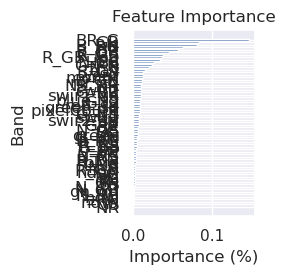

In [130]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 15})
feature_importance = modelA.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(3, 3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(modelA, X_testA, y_testA, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()



In [131]:
y_testA = 10**(y_testA)
predictionA = 10**(predictionA)
y_test = 10**(y_test)
prediction = 10**(prediction)

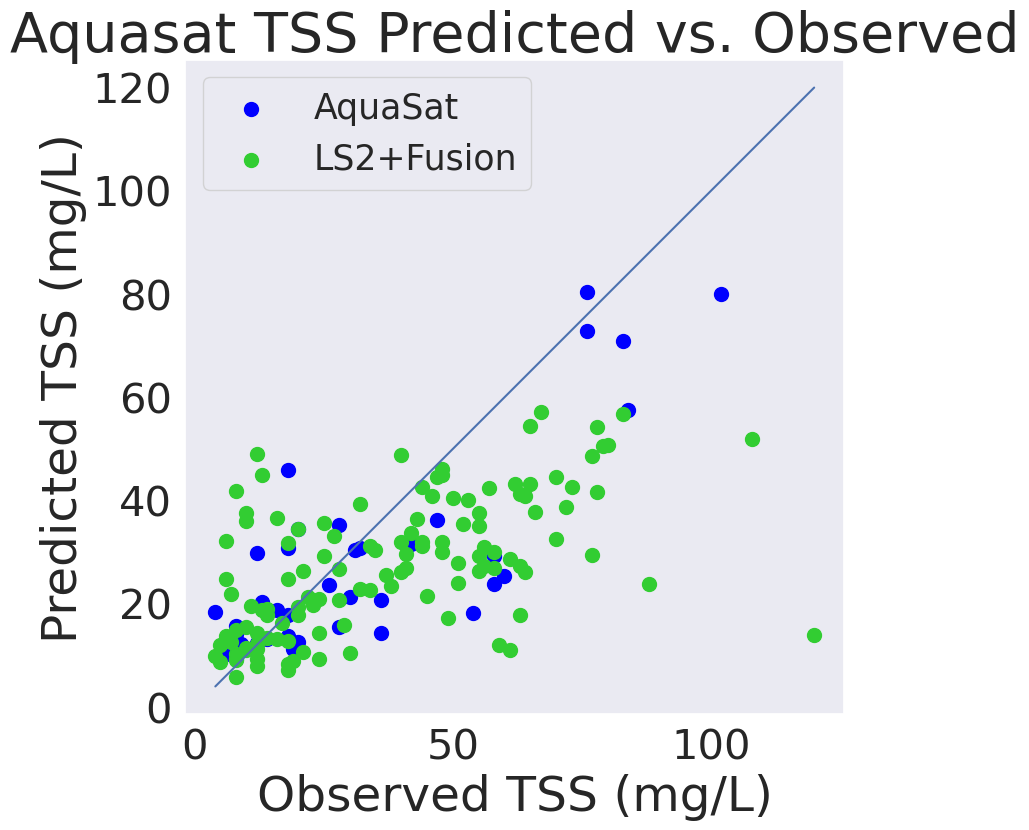

In [133]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='blue', label = 'AquaSat', s = 100)
plt.scatter((y_test), (prediction), c='limegreen', label = 'LS2+Fusion', s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat TSS Predicted vs. Observed', fontsize = 40)
plt.show()


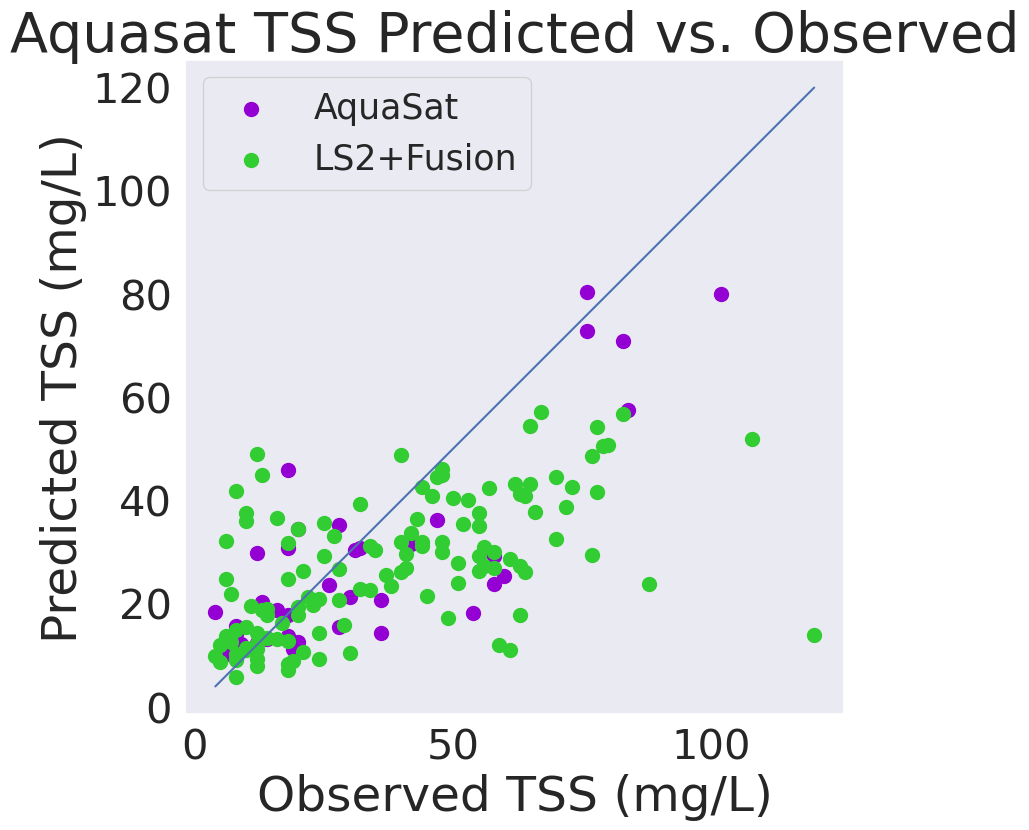

In [134]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='darkviolet', label = 'AquaSat', s = 100)
plt.scatter((y_test), (prediction), c='limegreen', label = 'LS2+Fusion', s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat TSS Predicted vs. Observed', fontsize = 40)
plt.show()


16.398


Text(0.5, 1.0, 'Prediction Absolute Errors')

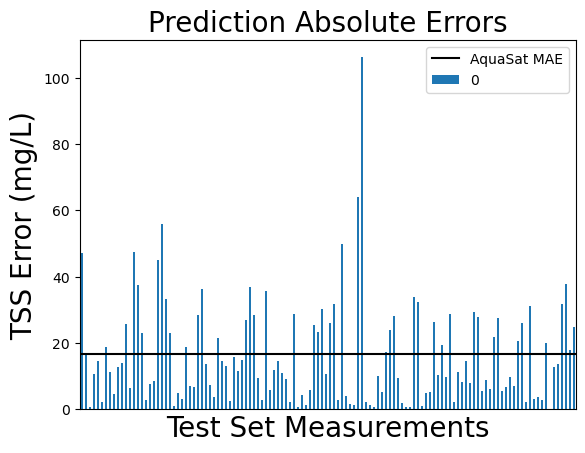

In [136]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs((prediction) - ((y_test)))
maeA = float(format(mean(errors), '.3f'))
print(maeA)
pd.DataFrame(errors).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = 16.84, color = 'black', linestyle = '-', label = 'AquaSat MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); plt.ylabel('TSS Error (mg/L)', fontsize = 20); plt.title('Prediction Absolute Errors', fontsize = 20)

In [48]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [137]:
data = {'AquaFusion (n = 308)':[train, test, rmse, mae],'AquaSat (n = 124)':[trainA, testA, rmseA, maeA]}
metric=pd.DataFrame(['Training Score', 'Testing Score', 'RMSE (mg/L)', 'MAE (mg/L)'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame(data)],axis=1)
mod_names = ['AquaFusion (n = 308)', 'AquaSat (n = 124)']

print(df)

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Model Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Metric Score', fontsize = 20)
plt.xlabel('Metric', fontsize = 20)
plt.xticks(rotation = '0', fontsize = 15)
plt.title(label = 'Model Metrics',fontsize = 20)
plt.tight_layout()
plt.show()

NameError: name 'train' is not defined

  Metric  AquaFusion  AquaSat
0    MAE        7.37    44.68
1   RMSE       10.10    49.54


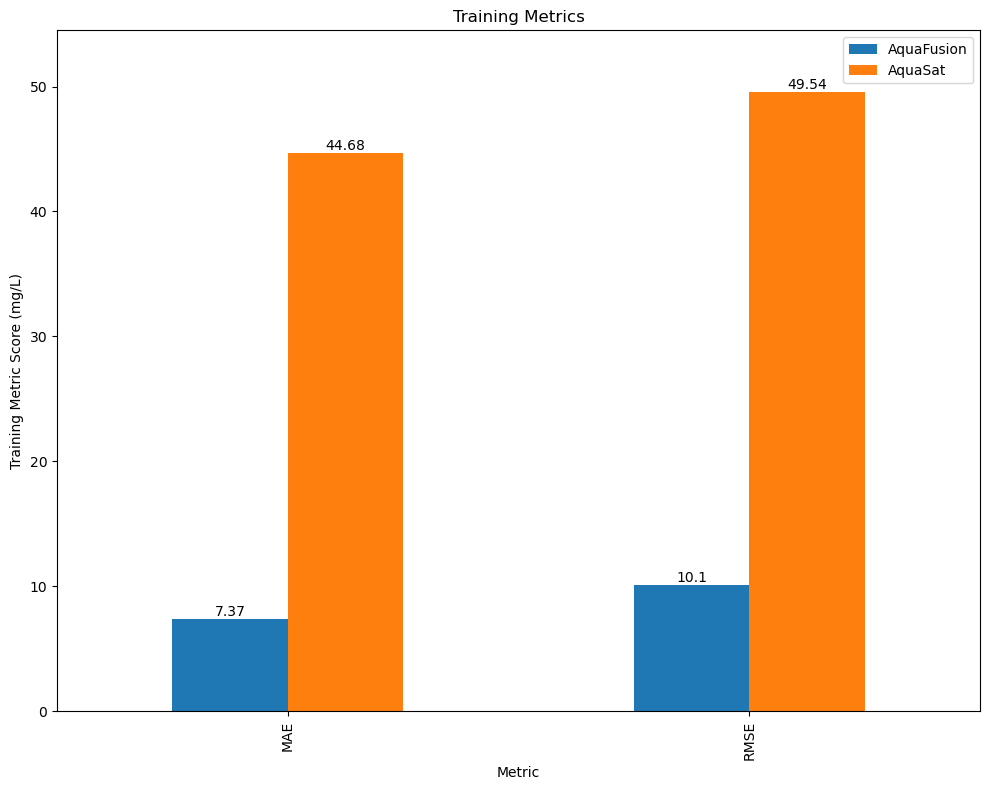

  Metric  AquaFusion  AquaSat
0    MAE       20.68    47.17
1   RMSE       31.32    52.54


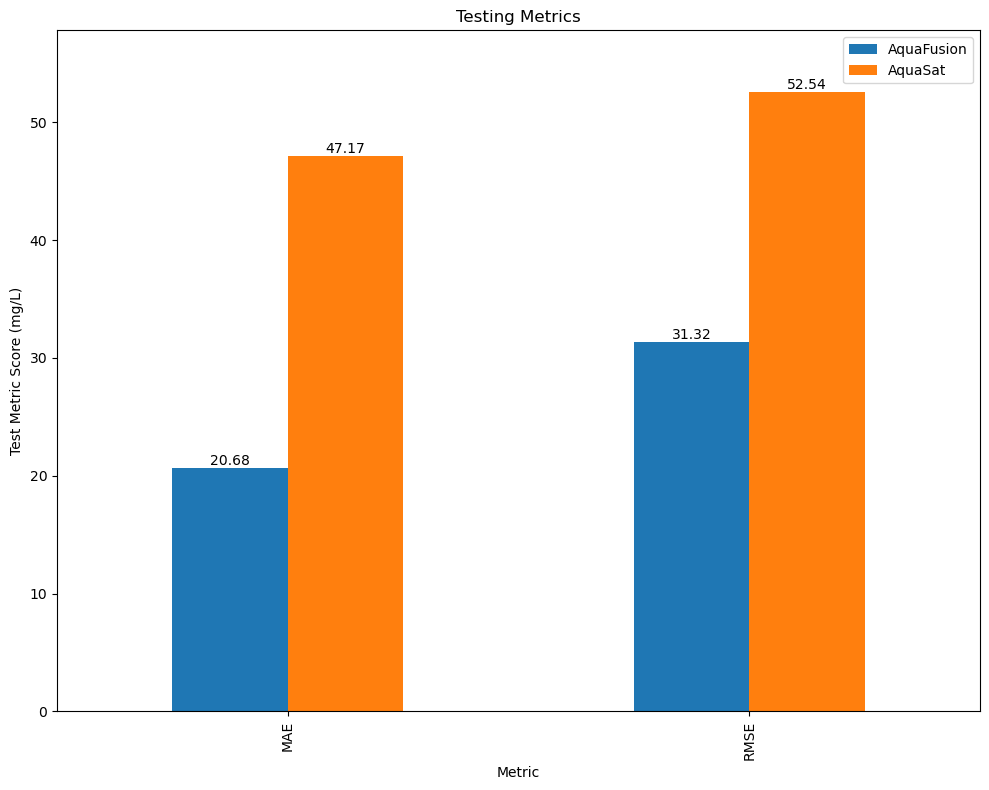

In [50]:
#Collect the test set predictions for d-h models

# model_pred = model.predict(X_test)
# model1_pred = model1.predict(X_test)


# Keep predictions of models d-h
model_train_pred = [model.predict(X_train), modelA.predict(X_train)]

model_test_pred = [model.predict(X_test), modelA.predict(X_test)]

# predicted MAE and MSE for training data

models_MAE = []
for i in model_train_pred:
    MAE = np.round(mean_absolute_error(y_train, i),2)
    models_MAE.append(MAE)

models_RMSE = []
for i in model_train_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_train, i)),2)
    models_RMSE.append(RMSE)

    
# Plot
mod_names=['AquaFusion', 'AquaSat']
metric=pd.DataFrame(['MAE','RMSE'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame([models_MAE,models_RMSE],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Training Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Training Metric Score (mg/L)')
plt.tight_layout()
plt.show()

#Predict MAE and RMSE for test data

models_MAE_test = []
for i in model_test_pred:
    MAE = np.round(mean_absolute_error(y_test, i),2)
    models_MAE_test.append(MAE)

models_RMSE_test = []
for i in model_test_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, i)),2)
    models_RMSE_test.append(RMSE)

# Plot
df = pd.concat([metric,pd.DataFrame([models_MAE_test,models_RMSE_test],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Testing Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Test Metric Score (mg/L)')
plt.tight_layout()
plt.show()

# Model with some fitted params

In [36]:
#define model
model1 = RandomForestRegressor(max_depth = 8, n_estimators = 150, min_samples_split = 2, max_features = 'sqrt', bootstrap = True, oob_score= True, warm_start = False, ccp_alpha = 0, min_impurity_decrease = 0)

In [37]:
#Quick eval raw
model1.fit(X_train, y_train)
print('Trained model oob score', 1 - model1.oob_score_)

prediction1 = model1.predict(X_test)
print('Test Score', model1.score(X_test, y_test))

Trained model oob score 0.7748260485549805
Test Score 0.019141613956127568


In [38]:
#Test Error: Model 1 RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#TEST

RMSE_model1 = np.sqrt(mean_squared_error(y_test, prediction1))

#Metrics
print('Training score', model1.score(X_train, y_train))
print('RMSE', RMSE_model1)
print('Testing score', model1.score(X_test, y_test))

Training score 0.8344340370804268
RMSE 29.48239133967024
Testing score 0.019141613956127568


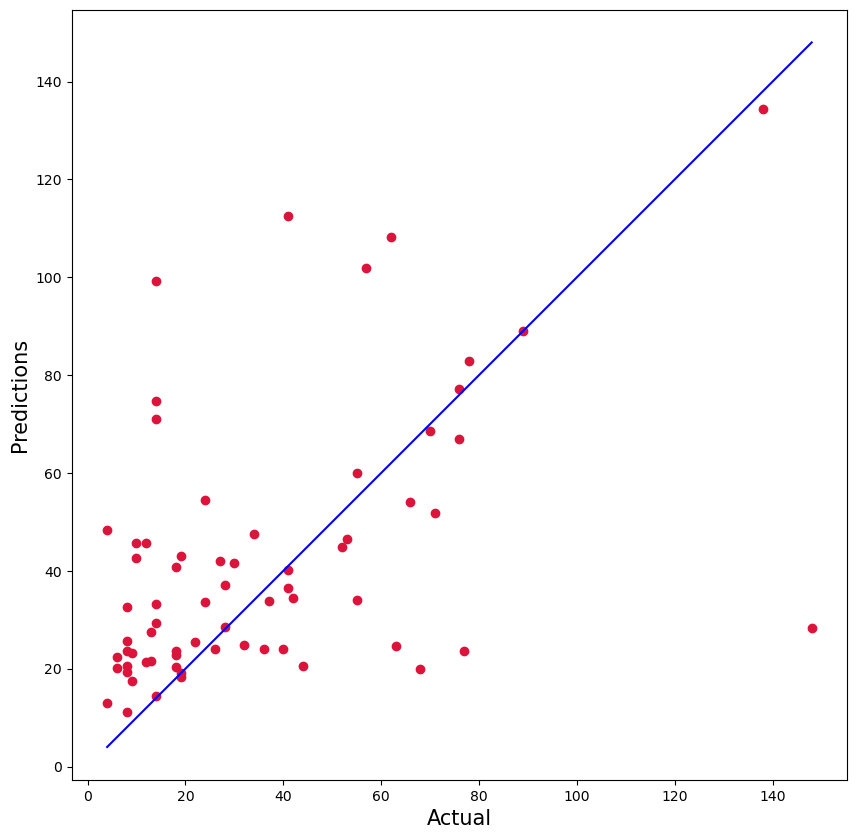

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

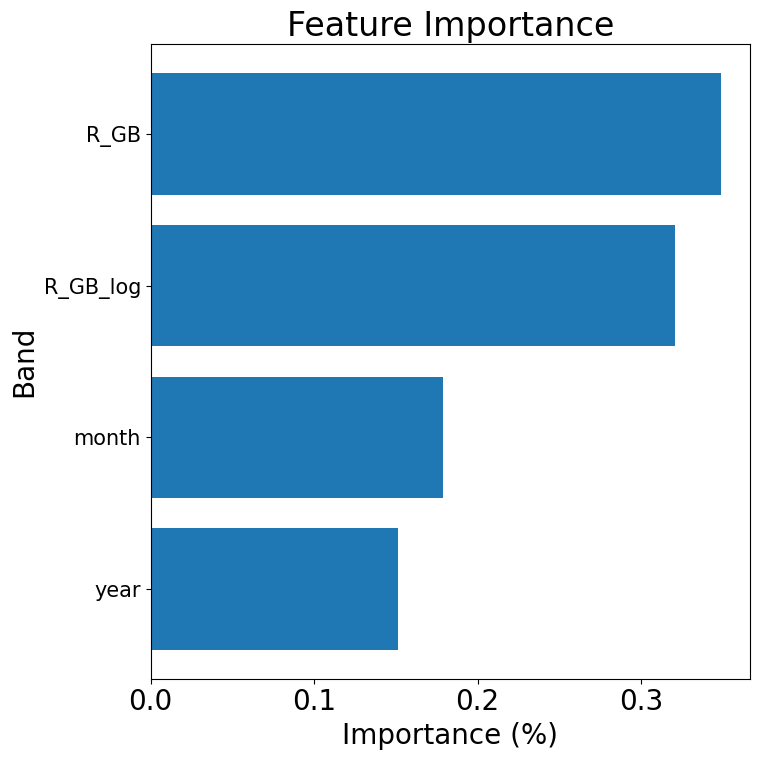

In [40]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 15)
plt.title('Feature Importance')
result = permutation_importance(model1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


## Regressions

In [51]:
import statsmodels.api as sm
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'

#define predictor and response variables
y = df['tss']
x = df['red']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

MissingDataError: exog contains inf or nans

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2253']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss_log']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2221']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(0.01, 1, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')